# TMDB Box Office Prediction EDA + ML

![](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)
[image-source](https://cdn-images-1.medium.com/max/1200/1*vIR7iO-1GnY2xYxL6NiYkw.png)

In a world... where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

In this competition, you're presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries. You can collect other publicly available data to use in your model predictions, but in the spirit of this competition, use only data that would have been available before a movie's release.

## *Kernel in progress, is continuously being updated and extended*

## Preparations - Prerequisities

![](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)
[image-source](https://images-na.ssl-images-amazon.com/images/I/91HTK796%2BML._SX425_.jpg)

### Loading Libraries

In [292]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
print(os.listdir("../input"))


import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

import gc

from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator

import warnings
warnings.filterwarnings("ignore")

['train.csv', 'sample_submission.csv', 'test.csv']


### Loading the data

In [293]:
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub_df = pd.read_csv('../input/sample_submission.csv')

### Inspecting the train set

In [294]:
train_df.head()

id    ...      revenue
0   1    ...     12314651
1   2    ...     95149435
2   3    ...     13092000
3   4    ...     16000000
4   5    ...      3923970

[5 rows x 23 columns]

We have a variaty of data, numerical, categorical and even lists of json formats.

In [295]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

### Check for NA values in trainset

In [296]:
train_df.isna().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [297]:
test_df.isna().sum()

id                          0
belongs_to_collection    3521
budget                      0
genres                     16
homepage                 2978
imdb_id                     0
original_language           0
original_title              0
overview                   14
popularity                  0
poster_path                 1
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
status                      2
tagline                   863
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

## Exploratory Data Analysis

![](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)
[image-source](https://prod-discovery.edx-cdn.org/media/course/image/2102f79d-9a44-41e9-9d92-884bec46dc65-ff40350cad17.small.jpg)

In [298]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

So many columns and features to investigate, lets start by inspecting one by one each feature.

### Univariate Analysis

#### Revenue
Our target variable that must be predicted

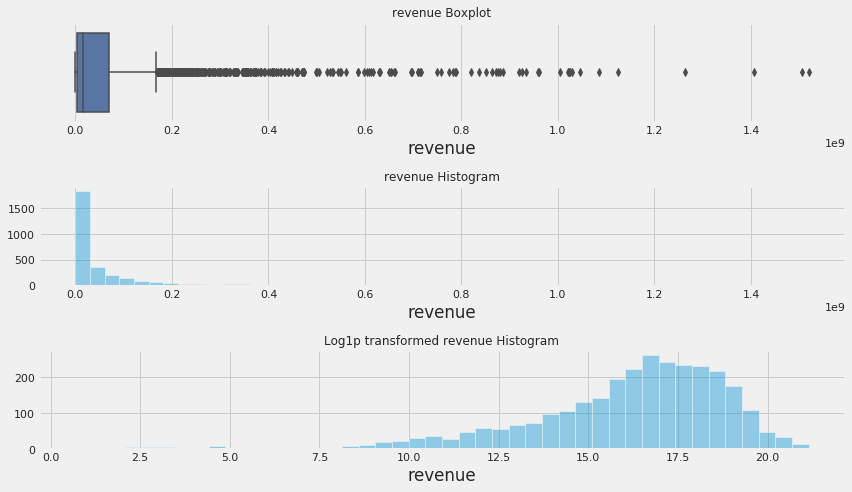

In [299]:
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.revenue, ax = ax[0])
ax[0].set_title("revenue Boxplot")
sns.distplot(a=train_df.revenue, kde = False, ax = ax[1])
ax[1].set_title("revenue Histogram")
sns.distplot(a=np.log1p(train_df.revenue), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed revenue Histogram")
f.tight_layout()

train_df["log_revenue"] = np.log1p(train_df.revenue)




#### Title
Lets generate a wordcloud

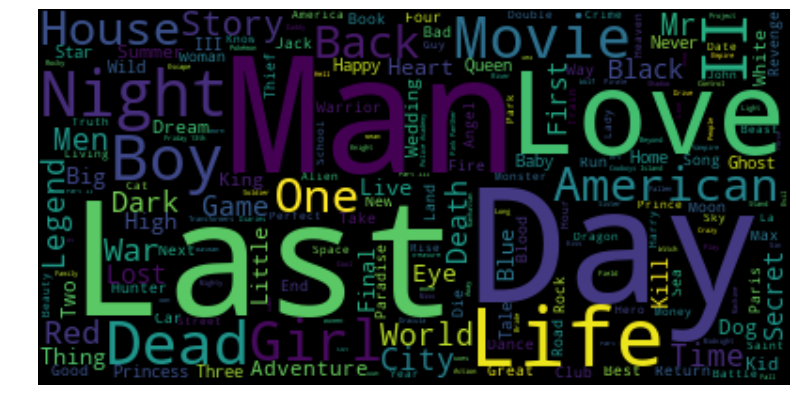

In [300]:
wordcloud = WordCloud().generate(train_df.title.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Lets see the length of each movie

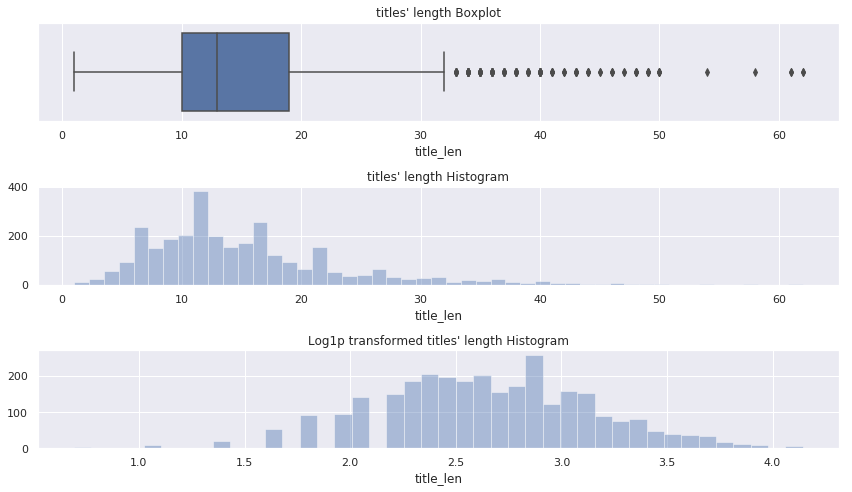

In [301]:
train_df["title"] = train_df["title"].fillna("")
test_df["title"] = test_df["title"].fillna("")

train_df["title_len"] = train_df["title"].apply(len)
test_df["title_len"] = test_df["title"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.title_len, ax = ax[0])
ax[0].set_title("titles' length Boxplot")
sns.distplot(a=train_df.title_len, kde = False, ax = ax[1])
ax[1].set_title("titles' length Histogram")
sns.distplot(a=np.log1p(train_df.title_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed titles' length Histogram")
f.tight_layout()

train_df["log_title_len"] = np.log1p(train_df.title_len)
test_df["log_title_len"] = np.log1p(test_df.title_len)

#### Overview
Lets visualize movies' overview wordcloud

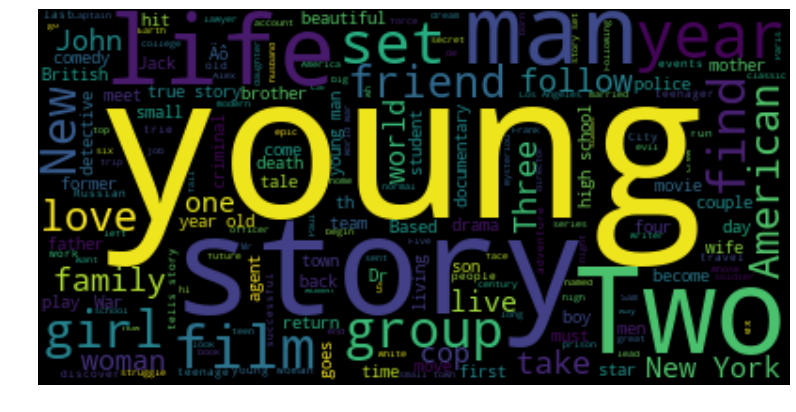

In [302]:
wordcloud = WordCloud().generate(train_df.overview.to_string())

sns.set(rc={'figure.figsize':(12,8)})

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

Inspecting movies' overview length

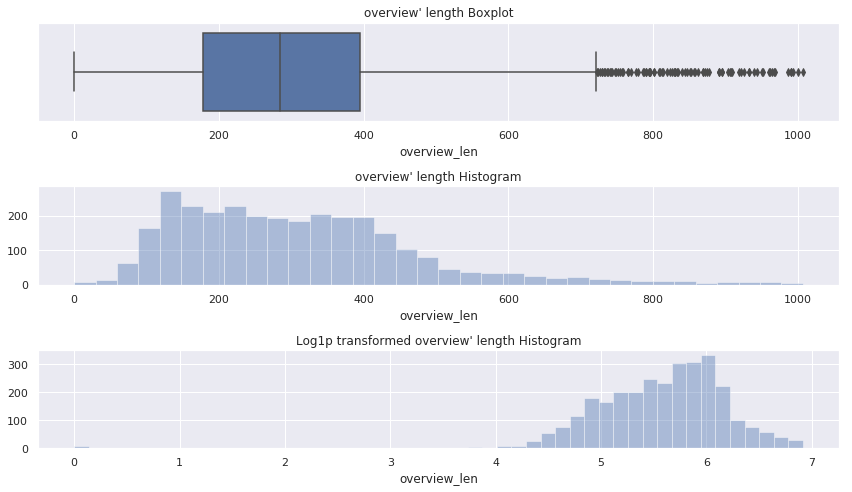

In [303]:
train_df["overview"] = train_df["overview"].fillna("")
test_df["overview"] = test_df["overview"].fillna("")

train_df["overview_len"] = train_df["overview"].apply(len)
test_df["overview_len"] = test_df["overview"].apply(len)

f, ax = plt.subplots(3, figsize=(12,7))
sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.overview_len, ax = ax[0])
ax[0].set_title("overview' length Boxplot")
sns.distplot(a=train_df.overview_len, kde = False, ax = ax[1])
ax[1].set_title("overview' length Histogram")
sns.distplot(a=np.log1p(train_df.overview_len), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed overview' length Histogram")
f.tight_layout()

train_df["log_overview_len"] = np.log1p(train_df.overview_len)
test_df["log_overview_len"] = np.log1p(test_df.overview_len)

#### Budget

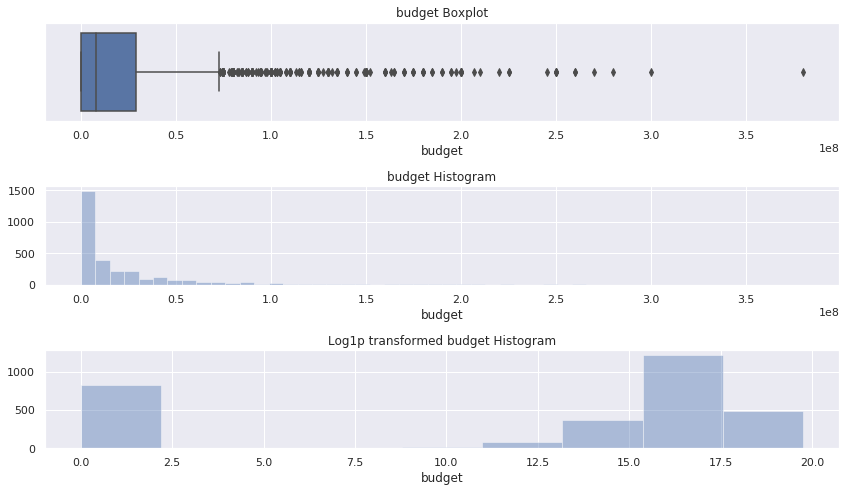

In [304]:
f, ax = plt.subplots(3, figsize=(12,7))

sns.set(rc={'figure.figsize':(12,8)})
sns.boxplot(x=train_df.budget, ax = ax[0])
ax[0].set_title("budget Boxplot")
sns.distplot(a=train_df.budget, kde = False, ax = ax[1])
ax[1].set_title("budget Histogram")
sns.distplot(a=np.log1p(train_df.budget), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed budget Histogram")
f.tight_layout()

train_df["log_budget"] = np.log1p(train_df.budget)
test_df["log_budget"] = np.log1p(test_df.budget)

#### Genres

Text(0.5, 1.0, 'Number of films per genre')

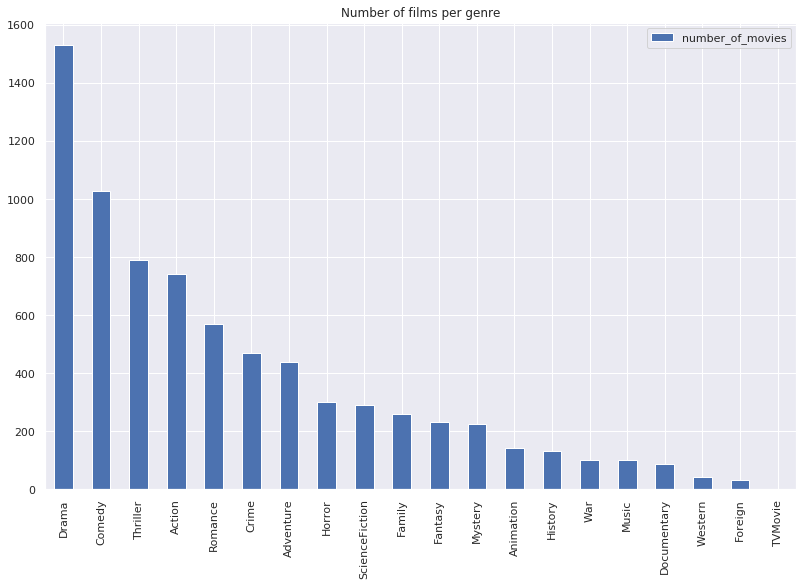

In [305]:
def genres_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace('\'','').replace(' ','').replace("name", "").replace("id", "").replace(":", "")
    ll = str1.split(",")[1::2]
    return ll

train_df["genres_processed"] = train_df.genres.apply(lambda elem: genres_preprocessing(elem))
test_df["genres_processed"] = test_df.genres.apply(lambda elem: genres_preprocessing(elem))

genres_dict = dict()

for genre in train_df["genres_processed"]:
    for elem in genre:
        if elem not in genres_dict:
            genres_dict[elem] = 1
        else:
            genres_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
genres_df = pd.DataFrame.from_dict(genres_dict, orient='index')
genres_df.columns = ["number_of_movies"]
genres_df = genres_df.sort_values(by="number_of_movies", ascending=False)
genres_df.plot.bar()
plt.title("Number of films per genre")

#### Number of Genres

Text(0.5, 1.0, 'Number of films with more than 1 genre')

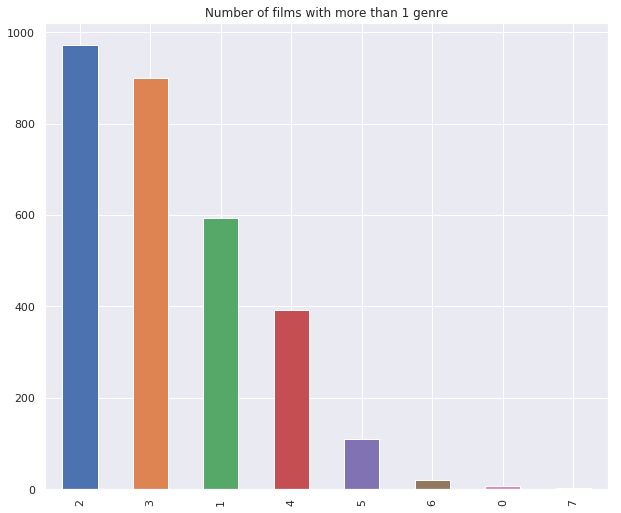

In [306]:
sns.set(rc={'figure.figsize':(9,8)})
train_df['num_genres'] = train_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)
test_df['num_genres'] = test_df['genres_processed'].apply(lambda x: len(x) if x != {} else 0)

train_df['num_genres'].value_counts().plot.bar()
plt.title("Number of films with more than 1 genre")

#### isGenre, feature engineering, creating new feature
isDrama, isComedy etc.

In [307]:
genres_df.index.values
for g in genres_df.index.values:
    train_df['isGenre_' + g] = train_df['genres_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isGenre_' + g] = test_df['genres_processed'].apply(lambda x: 1 if g in x else 0)

In [308]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue',
       'log_revenue', 'title_len', 'log_title_len', 'overview_len',
       'log_overview_len', 'log_budget', 'genres_processed', 'num_genres',
       'isGenre_Drama', 'isGenre_Comedy', 'isGenre_Thriller', 'isGenre_Action',
       'isGenre_Romance', 'isGenre_Crime', 'isGenre_Adventure',
       'isGenre_Horror', 'isGenre_ScienceFiction', 'isGenre_Family',
       'isGenre_Fantasy', 'isGenre_Mystery', 'isGenre_Animation',
       'isGenre_History', 'isGenre_War', 'isGenre_Music',
       'isGenre_Documentary', 'isGenre_Western', 'isGenre_Foreign',
       'isGenre_TVMovie'],
      dtype='object')

#### Original Language

Text(0.5, 1.0, 'Number of films per language')

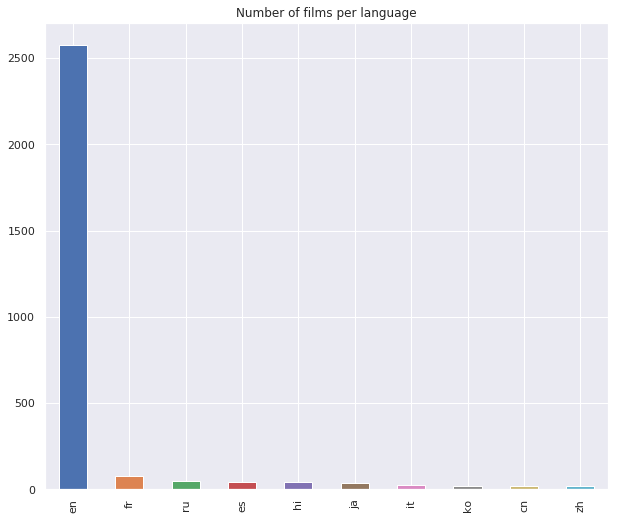

In [309]:
train_df.original_language.value_counts()[:10].plot.bar()
plt.title("Number of films per language")

#### English and Non-English movies

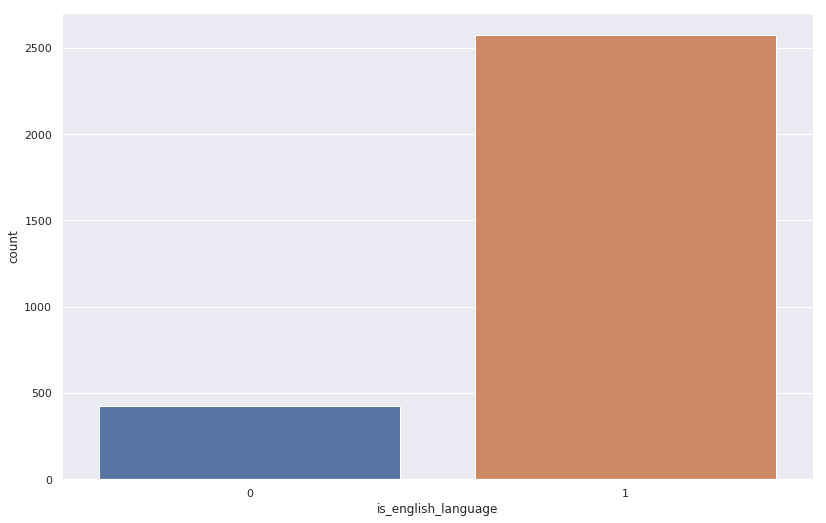

In [310]:

train_df["is_english_language"] = train_df.original_language.apply(lambda x: 1 if x == "en" else 0)
test_df["is_english_language"] = test_df.original_language.apply(lambda x: 1 if x == "en" else 0)

train_df.is_english_language = train_df.is_english_language.fillna(1)
test_df.is_english_language = test_df.is_english_language.fillna(1)

sns.set(rc={'figure.figsize':(12,8)})
ax = sns.countplot(x="is_english_language", data=train_df)

#### Production Companies

Text(0.5, 1.0, 'Number of films per production company')

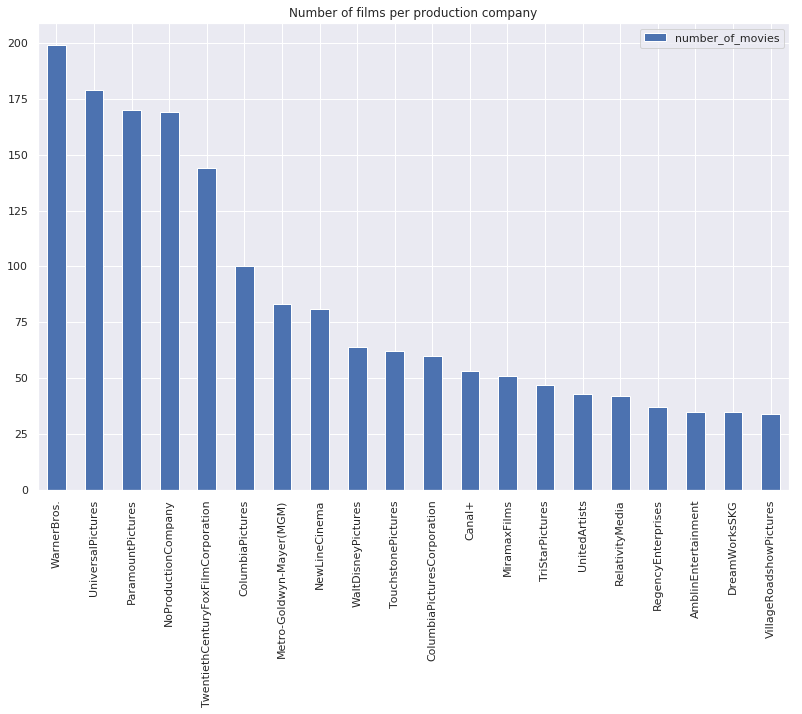

In [311]:
def production_companies_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("id", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_companies"] = train_df.production_companies.fillna('NoProductionCompany')
train_df["production_companies"] = test_df.production_companies.fillna('NoProductionCompany')

train_df["production_companies_processed"] = train_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))
test_df["production_companies_processed"] = test_df.production_companies.apply(lambda elem: production_companies_preprocessing(elem))



production_companies_dict = dict()

for production_company in train_df["production_companies_processed"]:
    for elem in production_company:
        if elem not in production_companies_dict:
            production_companies_dict[elem] = 1
        else:
            production_companies_dict[elem] += 1


sns.set(rc={'figure.figsize':(12,8)})
production_companies_df = pd.DataFrame.from_dict(production_companies_dict, orient='index')
production_companies_df.columns = ["number_of_movies"]
production_companies_df = production_companies_df.sort_values(by="number_of_movies", ascending=False)
production_companies_df.head(20).plot.bar()
plt.title("Number of films per production company")

#### Number of Production Companies

Text(0.5, 1.0, 'Number of multiple production companies per movie')

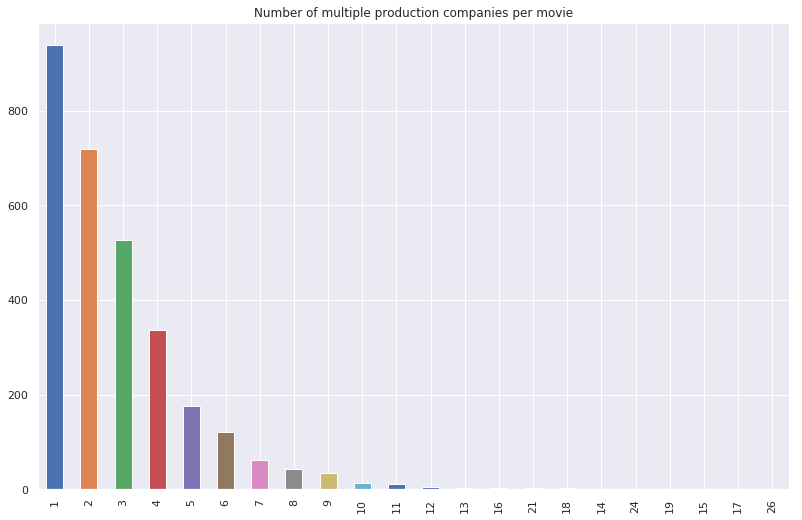

In [312]:
train_df["num_of_production_companies"] = train_df.production_companies_processed.apply(len)
test_df["num_of_production_companies"] = test_df.production_companies_processed.apply(len)

train_df["num_of_production_companies"].value_counts().plot.bar()
plt.title("Number of multiple production companies per movie")

#### isProductionCompany feature engineering
Feature Engineering with all the production companies

In [313]:
for g in production_companies_df.index.values:
    train_df['isProductionCompany_' + g] = train_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)
    test_df['isProductionCompany_' + g] = test_df['production_companies_processed'].apply(lambda x: 1 if g in x else 0)

#### production_countries

Text(0.5, 1.0, 'Number of films per production country')

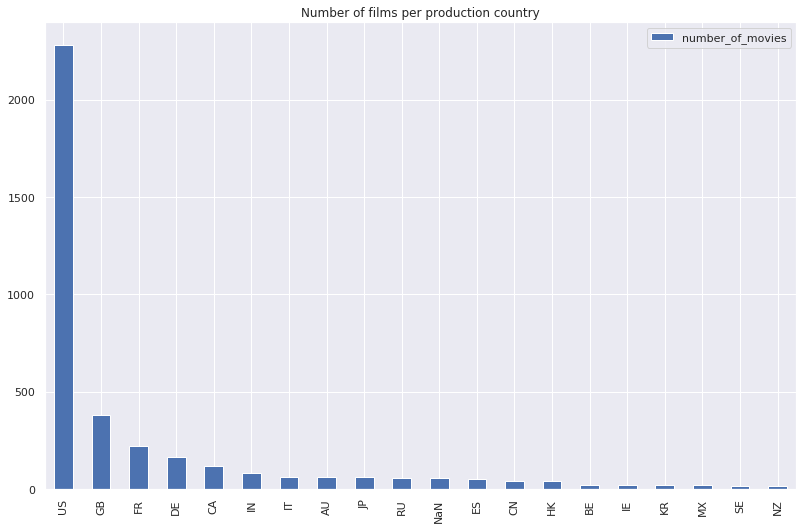

In [314]:
def production_countries_preprocessing(elem):
    string = str(elem)
    str1 = string.replace(']','').replace('[','').replace('{','').replace('}','').replace(' ','').replace("name", "").replace("iso_3166_1", "").replace(":", "").replace("\'", "")
    ll = str1.split(",")[0::2]
    return ll

train_df["production_countries_processed"] = train_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))
test_df["production_countries_processed"] = test_df.production_countries.fillna("NaN").apply(lambda elem: production_countries_preprocessing(elem))


production_countries_dict = dict()

for production_country in train_df["production_countries_processed"]:
    for elem in production_country:
        if elem not in production_countries_dict:
            production_countries_dict[elem] = 1
        else:
            production_countries_dict[elem] += 1



production_countries_df = pd.DataFrame.from_dict(production_countries_dict, orient='index')
production_countries_df.columns = ["number_of_movies"]
production_countries_df = production_countries_df.sort_values(by="number_of_movies", ascending=False)
production_countries_df.head(20).plot.bar()
plt.title("Number of films per production country")

#### isProduction_country feature engineering

In [315]:
for c in production_countries_df.index.values:
    train_df['isProductionCountry_' + c] = train_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)
    test_df['isProductionCountry_' + c] = test_df['production_countries_processed'].apply(lambda x: 1 if c in x else 0)

#### popularity

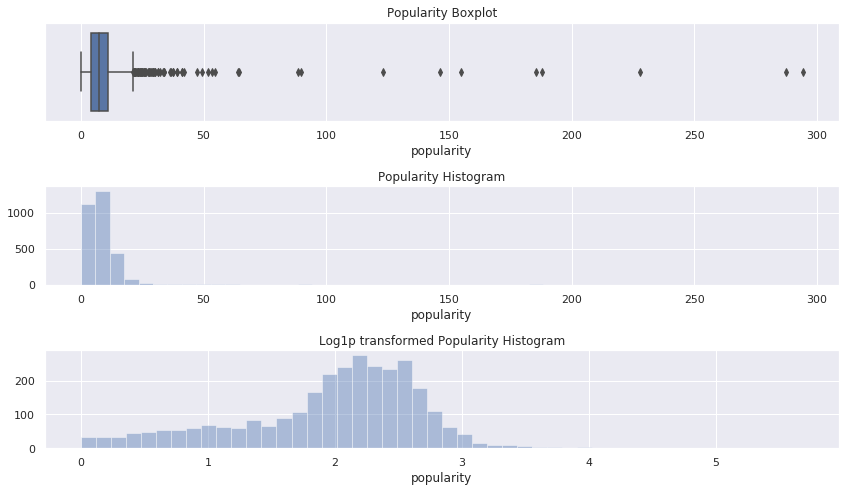

In [316]:
f, ax = plt.subplots(3, figsize=(12,7))
sns.boxplot(x=train_df.popularity, ax = ax[0])
ax[0].set_title("Popularity Boxplot")
sns.distplot(a=train_df.popularity, kde = False, ax = ax[1])
ax[1].set_title("Popularity Histogram")
sns.distplot(a=np.log1p(train_df.popularity), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed Popularity Histogram")
f.tight_layout()

train_df["log_popularity"] = np.log1p(train_df.popularity)
test_df["log_popularity"] = np.log1p(test_df.popularity)

#### Runtime

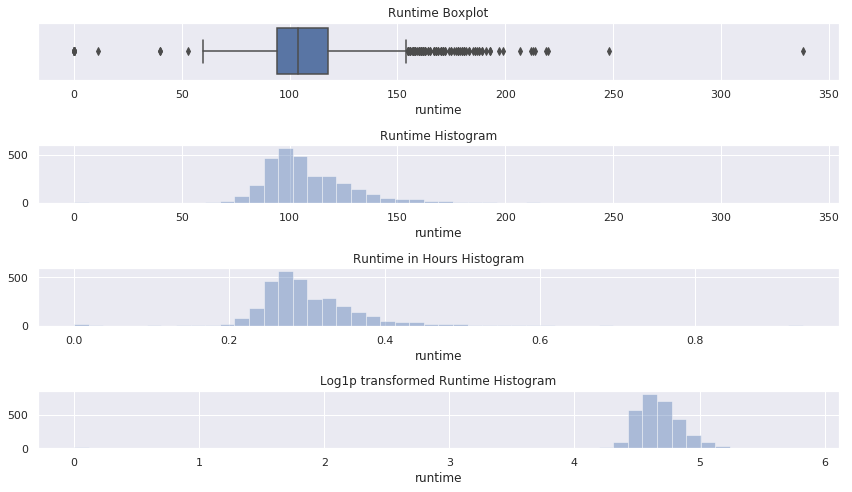

In [317]:
train_df["runtime"] = train_df["runtime"].fillna(train_df["runtime"].mode()[0])
test_df["runtime"] = test_df["runtime"].fillna(test_df["runtime"].mode()[0])

f, ax = plt.subplots(4, figsize=(12,7))

train_df.runtime = train_df.runtime.fillna(train_df.runtime.mode())

sns.boxplot(x=train_df.runtime, ax = ax[0])
ax[0].set_title("Runtime Boxplot")
sns.distplot(a=train_df.runtime, kde = False, ax = ax[1])
ax[1].set_title("Runtime Histogram")
sns.distplot(a=train_df.runtime/360, kde = False, ax = ax[2])
ax[2].set_title("Runtime in Hours Histogram")
sns.distplot(a=np.log1p(train_df.runtime), kde = False, ax = ax[3])
ax[3].set_title("Log1p transformed Runtime Histogram")
f.tight_layout()

train_df["runtime_in_hours"] = train_df.runtime/360
test_df["runtime_in_hours"] = test_df.runtime/360

train_df["log_runtime"] = np.log1p(train_df.runtime)
test_df["log_runtime"] = np.log1p(test_df.runtime)

#### Release Date preprocessing before EDA and ML

In [318]:
from datetime import datetime

# fill possible NA values with the statistical mode
train_df["release_date"] = train_df["release_date"].fillna(train_df["release_date"].mode()[0])
test_df["release_date"] = test_df["release_date"].fillna(test_df["release_date"].mode()[0])


train_df['temp'] = train_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

train_df["month"] = train_df.temp.apply(lambda x: x.month)
train_df["season"] = train_df["month"]%4
train_df["year"] = train_df.temp.apply(lambda x: x.year)
train_df["day_of_week"] = train_df.temp.apply(lambda x: x.weekday()+1)
train_df["week_of_year"] = train_df.temp.apply(lambda x: x.isocalendar()[1])

train_df = train_df.drop(['temp'], axis=1)


test_df['temp'] = test_df.release_date.apply(lambda x: datetime.strptime(x, '%m/%d/%y'))

test_df["month"] = test_df.temp.apply(lambda x: x.month)
test_df["season"] = test_df["month"]%4
test_df["year"] = test_df.temp.apply(lambda x: x.year)
test_df["day_of_week"] = test_df.temp.apply(lambda x: x.weekday()+1)
test_df["week_of_year"] = test_df.temp.apply(lambda x: x.isocalendar()[1])

test_df = test_df.drop(['temp'], axis=1)



train_df["day_of_week"] = train_df["day_of_week"].fillna(train_df["day_of_week"].mode()[0])
test_df["day_of_week"] = test_df["day_of_week"].fillna(test_df["day_of_week"].mode()[0])

train_df["year"] = train_df["year"].fillna(train_df["year"].mode()[0])
test_df["year"] = test_df["year"].fillna(test_df["year"].mode()[0])

train_df["month"] = train_df["month"].fillna(train_df["month"].mode()[0])
test_df["month"] = test_df["month"].fillna(test_df["month"].mode()[0])

train_df["week_of_year"] = train_df["week_of_year"].fillna(train_df["week_of_year"].mode()[0])
test_df["week_of_year"] = test_df["week_of_year"].fillna(test_df["week_of_year"].mode()[0])

train_df["season"] = train_df["season"].fillna(train_df["season"].mode()[0])
test_df["season"] = test_df["season"].fillna(test_df["season"].mode()[0])

train_df[["release_date", "month", "year", "day_of_week", "week_of_year", "season"]].head()

release_date  month  year  day_of_week  week_of_year  season
0      2/20/15      2  2015            5             8       2
1       8/6/04      8  2004            5            32       0
2     10/10/14     10  2014            5            41       2
3       3/9/12      3  2012            5            10       3
4       2/5/09      2  2009            4             6       2

#### Month of Release, which month has most of the releases

Text(0.5, 1.0, 'Number of films per month')

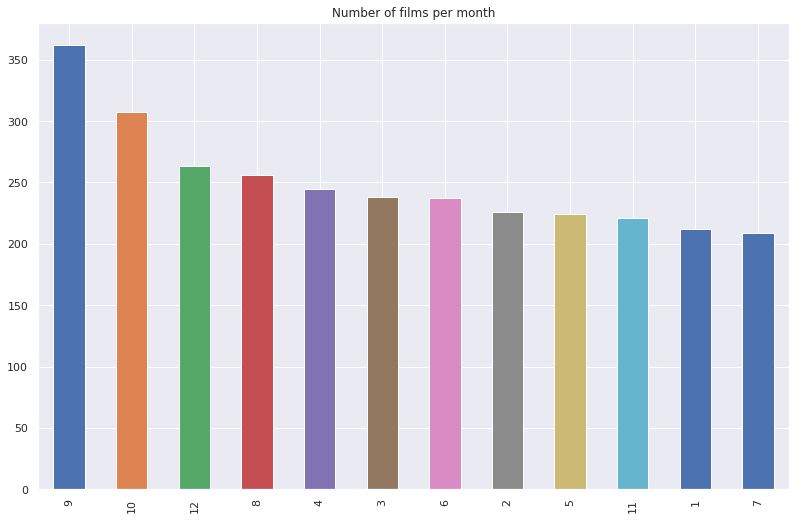

In [319]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.month.value_counts().plot.bar()
plt.title('Number of films per month')

#### Week of year, which week of the year has most of the releases

Text(0.5, 1.0, 'Number of films per week_of_year')

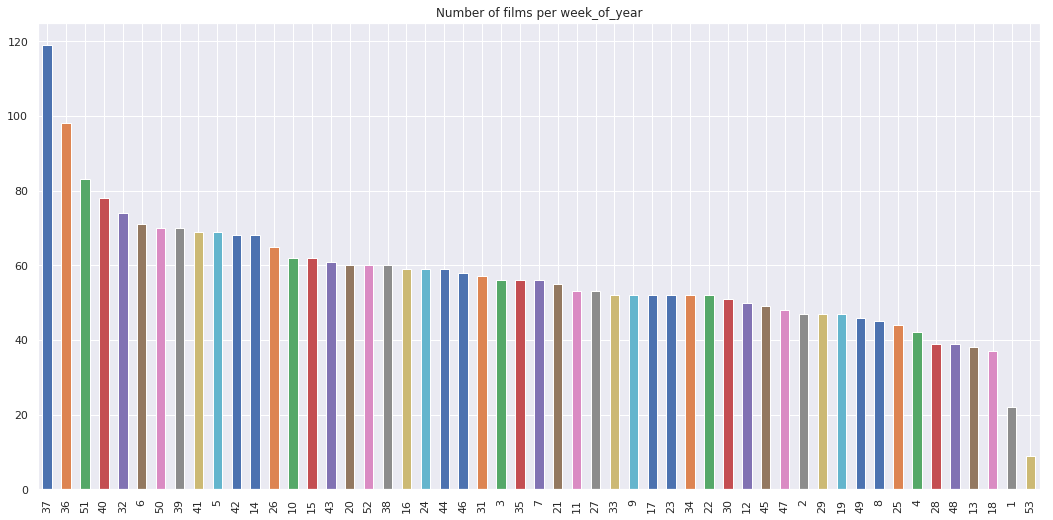

In [320]:
sns.set(rc={'figure.figsize':(16,8)})
train_df.week_of_year.value_counts().plot.bar()
plt.title('Number of films per week_of_year')

#### Season of Release, which season has most of the releases

Text(0.5, 1.0, 'Number of films per season')

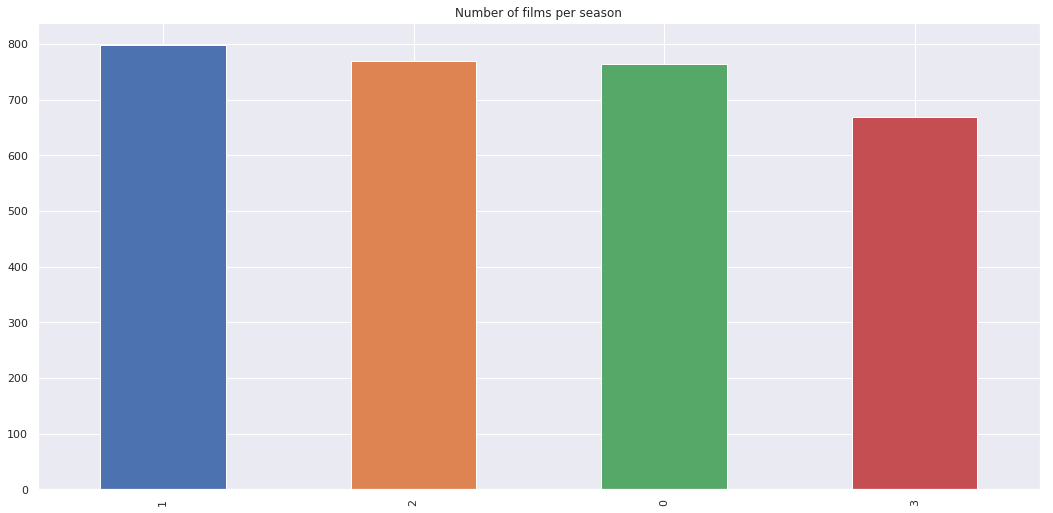

In [321]:
sns.set(rc={'figure.figsize':(16,8)})
train_df.season.value_counts().plot.bar()
plt.title('Number of films per season')

#### Day of Release, which day of the week has most of the releases

Text(0.5, 1.0, 'Number of films per day_of_week')

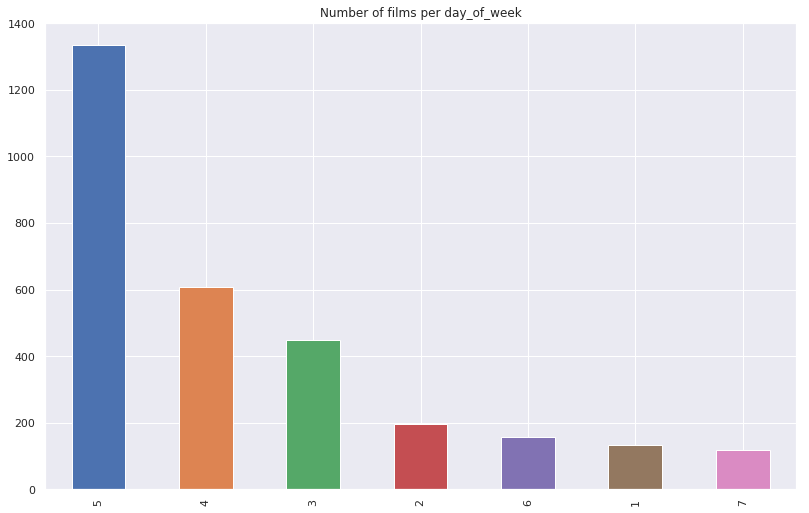

In [322]:
sns.set(rc={'figure.figsize':(12,8)})
train_df.day_of_week.value_counts().plot.bar()
plt.title('Number of films per day_of_week')

#### Year of Release, which year has most of the releases

Text(0.5, 1.0, 'Number of films per year')

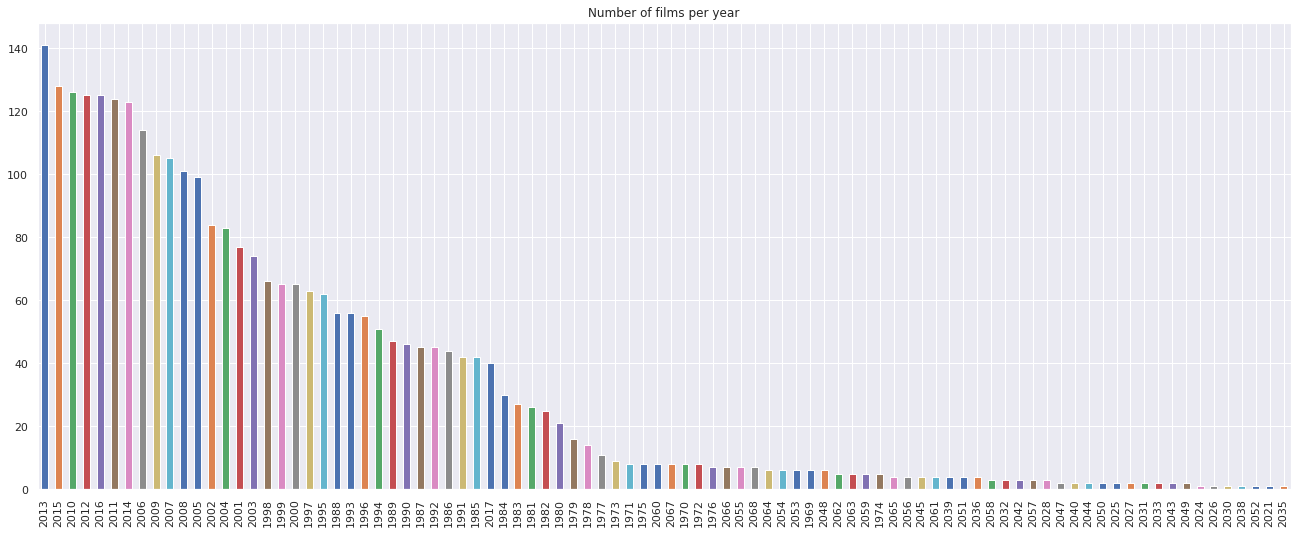

In [323]:
sns.set(rc={'figure.figsize':(20,8)})
train_df.year.value_counts().plot.bar()
plt.title('Number of films per year')

#### Cast
Number of cast

In [324]:
train_df["cast"][0]

"[{'cast_id': 4, 'character': 'Lou', 'credit_id': '52fe4ee7c3a36847f82afae7', 'gender': 2, 'id': 52997, 'name': 'Rob Corddry', 'order': 0, 'profile_path': '/k2zJL0V1nEZuFT08xUdOd3ucfXz.jpg'}, {'cast_id': 5, 'character': 'Nick', 'credit_id': '52fe4ee7c3a36847f82afaeb', 'gender': 2, 'id': 64342, 'name': 'Craig Robinson', 'order': 1, 'profile_path': '/tVaRMkJXOEVhYxtnnFuhqW0Rjzz.jpg'}, {'cast_id': 6, 'character': 'Jacob', 'credit_id': '52fe4ee7c3a36847f82afaef', 'gender': 2, 'id': 54729, 'name': 'Clark Duke', 'order': 2, 'profile_path': '/oNzK0umwm5Wn0wyEbOy6TVJCSBn.jpg'}, {'cast_id': 7, 'character': 'Adam Jr.', 'credit_id': '52fe4ee7c3a36847f82afaf3', 'gender': 2, 'id': 36801, 'name': 'Adam Scott', 'order': 3, 'profile_path': '/5gb65xz8bzd42yjMAl4zwo4cvKw.jpg'}, {'cast_id': 8, 'character': 'Hot Tub Repairman', 'credit_id': '52fe4ee7c3a36847f82afaf7', 'gender': 2, 'id': 54812, 'name': 'Chevy Chase', 'order': 4, 'profile_path': '/svjpyYtPwtjvRxX9IZnOmOkhDOt.jpg'}, {'cast_id': 9, 'character

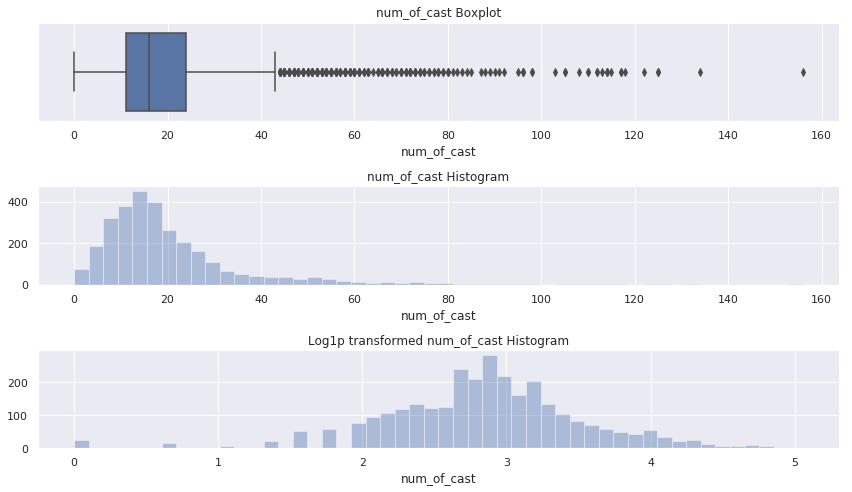

In [325]:
train_df["num_of_cast"] = train_df["cast"].str.count("name")
test_df["num_of_cast"] = test_df["cast"].str.count("name")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_cast = train_df.num_of_cast.fillna(0)
test_df.num_of_cast = test_df.num_of_cast.fillna(0)

sns.boxplot(x=train_df.num_of_cast, ax = ax[0])
ax[0].set_title("num_of_cast Boxplot")
sns.distplot(a=train_df.num_of_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_cast Histogram")
f.tight_layout()


train_df["log_num_of_cast"] = np.log1p(train_df.num_of_cast)
test_df["log_num_of_cast"] = np.log1p(test_df.num_of_cast)

#### Male cast
number of male cast

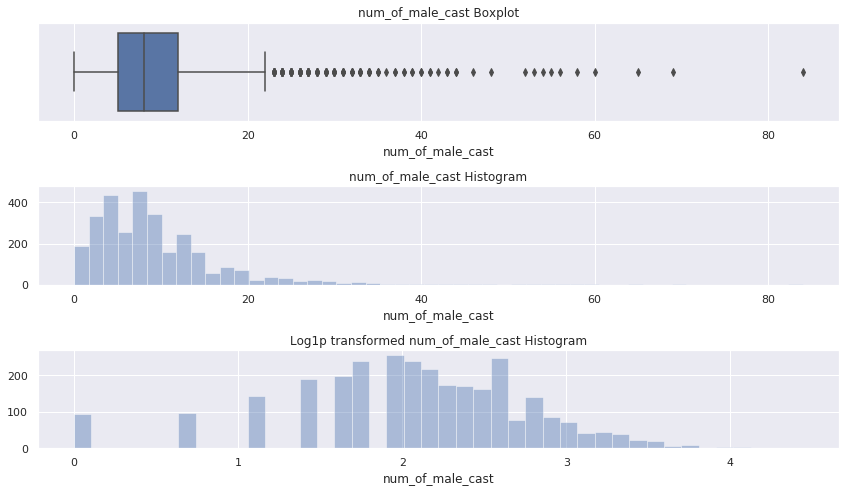

In [326]:
train_df["num_of_male_cast"] = train_df["cast"].str.count("'gender': 2")
test_df["num_of_male_cast"] = test_df["cast"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_male_cast = train_df.num_of_male_cast.fillna(0)
test_df.num_of_male_cast = test_df.num_of_male_cast.fillna(0)

sns.boxplot(x=train_df.num_of_male_cast, ax = ax[0])
ax[0].set_title("num_of_male_cast Boxplot")
sns.distplot(a=train_df.num_of_male_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_male_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_cast Histogram")
f.tight_layout()


train_df["log_num_of_male_cast"] = np.log1p(train_df.num_of_male_cast)
test_df["log_num_of_male_cast"] = np.log1p(test_df.num_of_male_cast)

#### Female cast
number of female cast

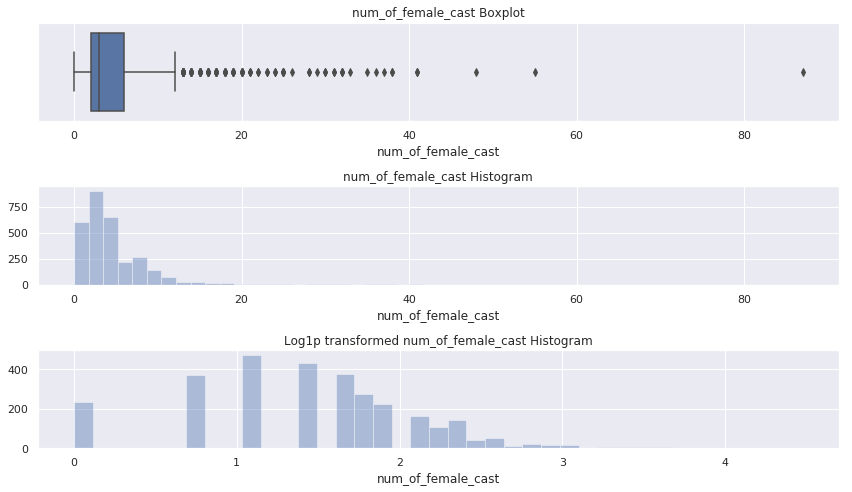

In [327]:
train_df["num_of_female_cast"] = train_df["cast"].str.count("'gender': 1")
test_df["num_of_female_cast"] = test_df["cast"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_female_cast = train_df.num_of_female_cast.fillna(0)
test_df.num_of_female_cast = test_df.num_of_female_cast.fillna(0)

sns.boxplot(x=train_df.num_of_female_cast, ax = ax[0])
ax[0].set_title("num_of_female_cast Boxplot")
sns.distplot(a=train_df.num_of_female_cast, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_cast Histogram")
sns.distplot(a=np.log1p(train_df.num_of_female_cast), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_cast Histogram")
f.tight_layout()


train_df["log_num_of_female_cast"] = np.log1p(train_df.num_of_female_cast)
test_df["log_num_of_female_cast"] = np.log1p(test_df.num_of_female_cast)

### Crew
Counting the number of crew

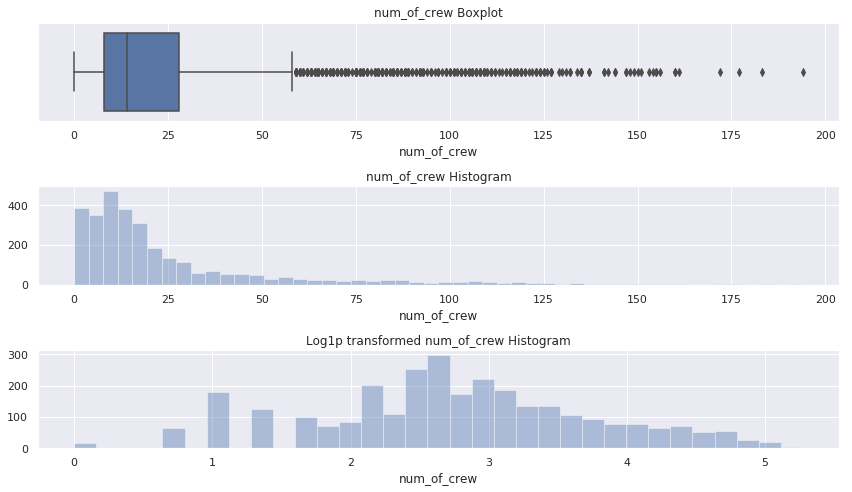

In [328]:
train_df["num_of_crew"] = train_df["crew"].str.count("'job")
test_df["num_of_crew"] = test_df["crew"].str.count("'job")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_crew = train_df.num_of_crew.fillna(0)
test_df.num_of_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_crew, ax = ax[0])
ax[0].set_title("num_of_crew Boxplot")
sns.distplot(a=train_df.num_of_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_crew Histogram")
f.tight_layout()


train_df["log_num_of_crew"] = np.log1p(train_df.num_of_crew)
test_df["log_num_of_crew"] = np.log1p(test_df.num_of_crew)

### Male Crew
Counting the number of male crew

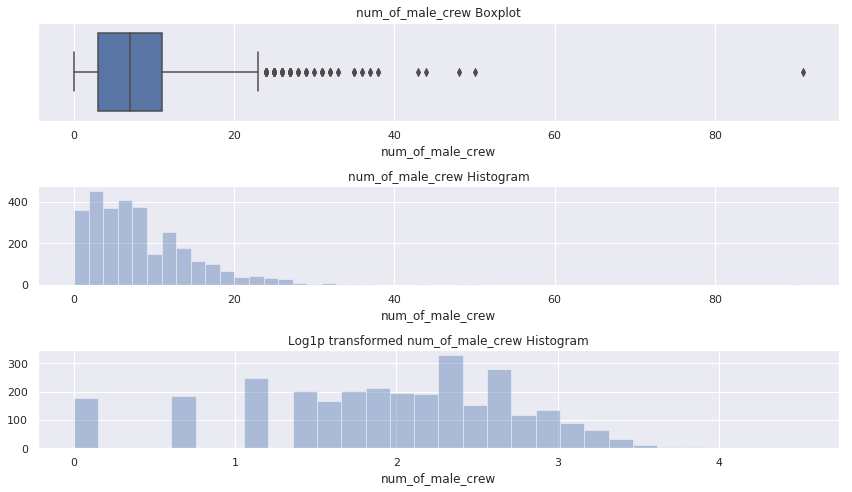

In [329]:
train_df["num_of_male_crew"] = train_df["crew"].str.count("'gender': 2")
test_df["num_of_male_crew"] = test_df["crew"].str.count("'gender': 2")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_male_crew = train_df.num_of_male_crew.fillna(0)
test_df.num_of_male_crew = test_df.num_of_crew.fillna(0)

sns.boxplot(x=train_df.num_of_male_crew, ax = ax[0])
ax[0].set_title("num_of_male_crew Boxplot")
sns.distplot(a=train_df.num_of_male_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_male_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_male_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_male_crew Histogram")
f.tight_layout()


train_df["log_num_of_male_crew"] = np.log1p(train_df.num_of_male_crew)
test_df["log_num_of_male_crew"] = np.log1p(test_df.num_of_male_crew)

### Female Crew
Counting the number of female crew

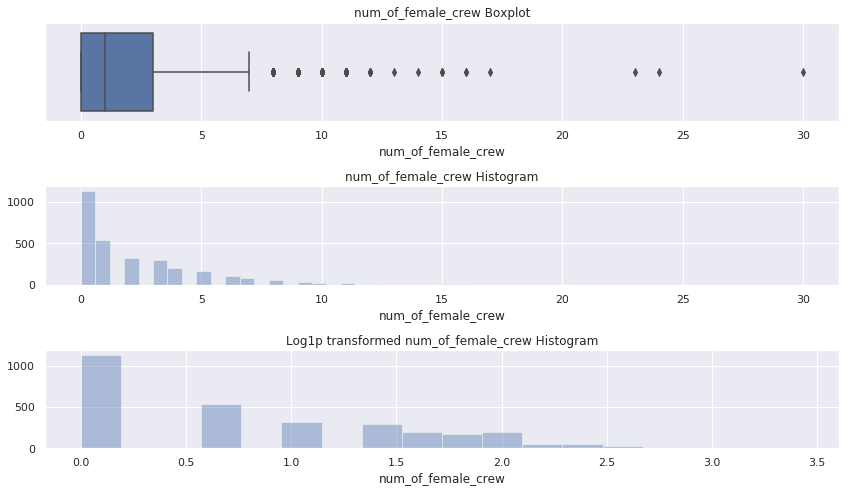

In [330]:
train_df["num_of_female_crew"] = train_df["crew"].str.count("'gender': 1")
test_df["num_of_female_crew"] = test_df["crew"].str.count("'gender': 1")

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_female_crew = train_df.num_of_female_crew.fillna(0)
test_df.num_of_female_crew = test_df.num_of_female_crew.fillna(0)

sns.boxplot(x=train_df.num_of_female_crew, ax = ax[0])
ax[0].set_title("num_of_female_crew Boxplot")
sns.distplot(a=train_df.num_of_female_crew, kde = False, ax = ax[1])
ax[1].set_title("num_of_female_crew Histogram")
sns.distplot(a=np.log1p(train_df.num_of_female_crew), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_female_crew Histogram")
f.tight_layout()


train_df["log_num_of_female_crew"] = np.log1p(train_df.num_of_female_crew)
test_df["log_num_of_female_crew"] = np.log1p(test_df.num_of_female_crew)

#### Production Countries

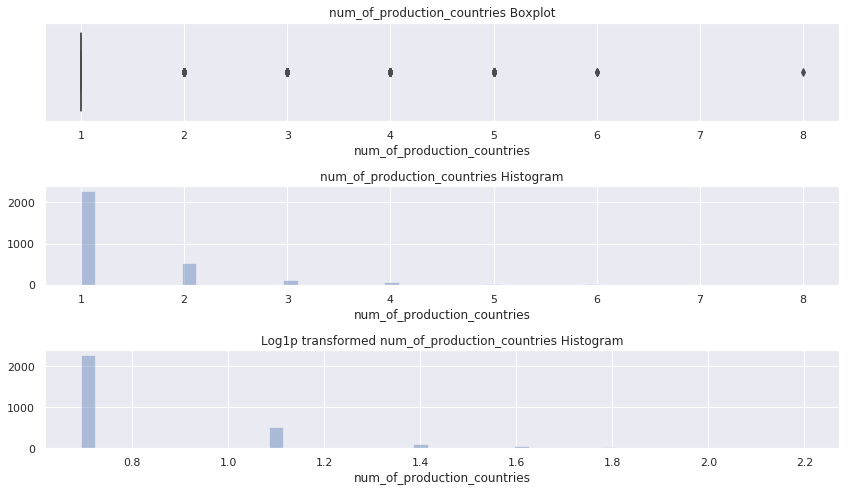

In [331]:
train_df["num_of_production_countries"] = train_df.production_countries_processed.apply(len)
test_df["num_of_production_countries"] = test_df.production_countries_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_production_countries = train_df.num_of_production_countries.fillna(0)
test_df.num_of_production_countries = test_df.num_of_production_countries.fillna(0)

sns.boxplot(x=train_df.num_of_production_countries, ax = ax[0])
ax[0].set_title("num_of_production_countries Boxplot")
sns.distplot(a=train_df.num_of_production_countries, kde = False, ax = ax[1])
ax[1].set_title("num_of_production_countries Histogram")
sns.distplot(a=np.log1p(train_df.num_of_production_countries), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_production_countries Histogram")
f.tight_layout()


train_df["log_num_of_production_countries"] = np.log1p(train_df.num_of_production_countries)
test_df["log_num_of_production_countries"] = np.log1p(test_df.num_of_production_countries)

#### Number of Genres in a movie

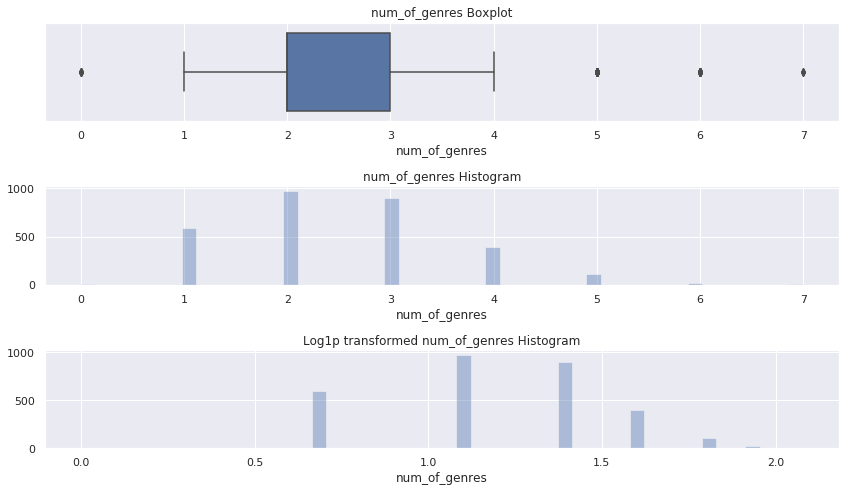

In [332]:
train_df["num_of_genres"] = train_df.genres_processed.apply(len)
test_df["num_of_genres"] = test_df.genres_processed.apply(len)

f, ax = plt.subplots(3, figsize=(12,7))

train_df.num_of_genres = train_df.num_of_genres.fillna(0)
test_df.num_of_genres = test_df.num_of_genres.fillna(0)

sns.boxplot(x=train_df.num_of_genres, ax = ax[0])
ax[0].set_title("num_of_genres Boxplot")
sns.distplot(a=train_df.num_of_genres, kde = False, ax = ax[1])
ax[1].set_title("num_of_genres Histogram")
sns.distplot(a=np.log1p(train_df.num_of_genres), kde = False, ax = ax[2])
ax[2].set_title("Log1p transformed num_of_genres Histogram")
f.tight_layout()


train_df["log_num_of_genres"] = np.log1p(train_df.num_of_genres)
test_df["log_num_of_genres"] = np.log1p(test_df.num_of_genres)

### EDA - Bivariate Analysis

#### Bivariate Analysis for numerical features

Text(0.5, 1.0, 'Correlation between numerical features')

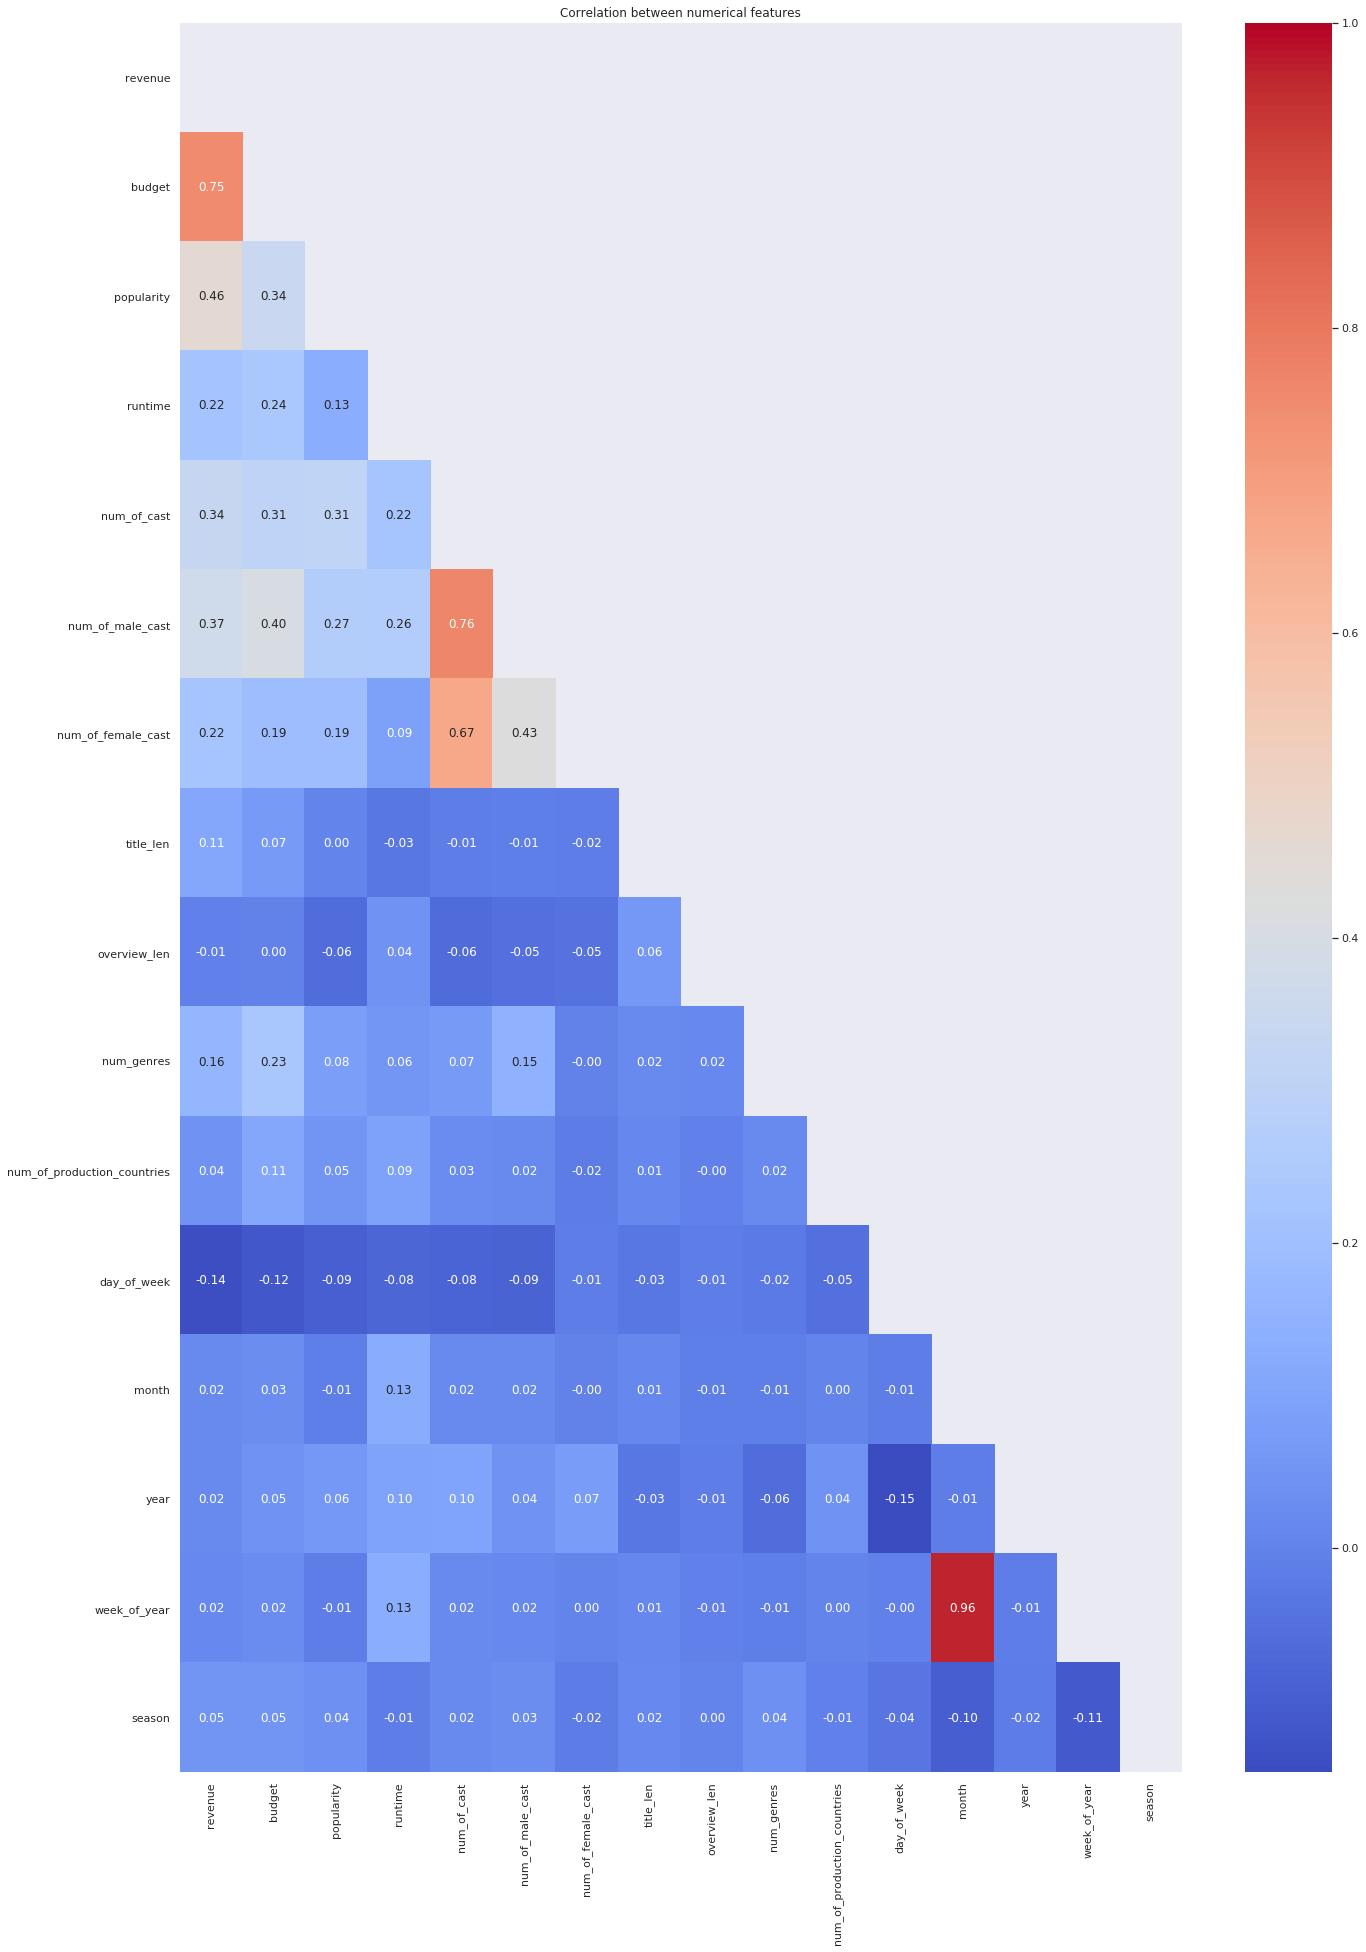

In [333]:
sns.set(rc={'figure.figsize':(20,30)})

# Compute the correlation matrix
corr = train_df[["revenue", "budget", "popularity", "runtime", "num_of_cast", "num_of_male_cast",
                 "num_of_female_cast", "title_len", "overview_len",
                 "num_genres", "num_of_production_countries", "day_of_week", "month", "year", "week_of_year", "season"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between numerical features")

#### Bivariate Analysis for log-transformed numerical features

Text(0.5, 1.0, 'Correlation between log1p transformed numerical features')

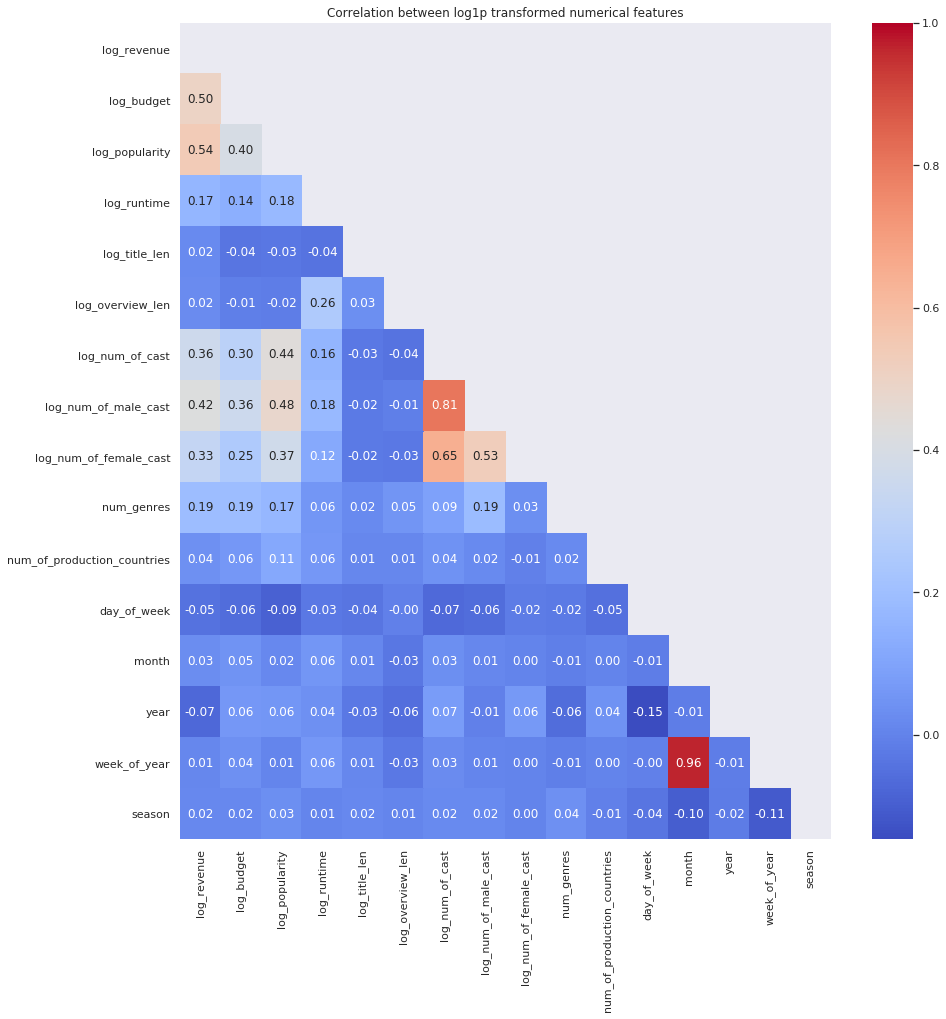

In [334]:
sns.set(rc={'figure.figsize':(13,14)})

# Compute the correlation matrix
corr = train_df[["log_revenue", "log_budget", "log_popularity", "log_runtime", "log_title_len", "log_overview_len",
                 "log_num_of_cast", "log_num_of_male_cast",
                 "log_num_of_female_cast", "num_genres", "num_of_production_countries",
                "day_of_week", "month", "year", "week_of_year", "season"]].corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(corr, mask=mask, 
            annot=True, 
            fmt=".2f", 
            cmap='coolwarm')

plt.title("Correlation between log1p transformed numerical features")

### Bivariate Analysis and Feature Engineering

#### has_collection and revenue

0    2396
1     604
Name: has_collection, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without being in a collection')

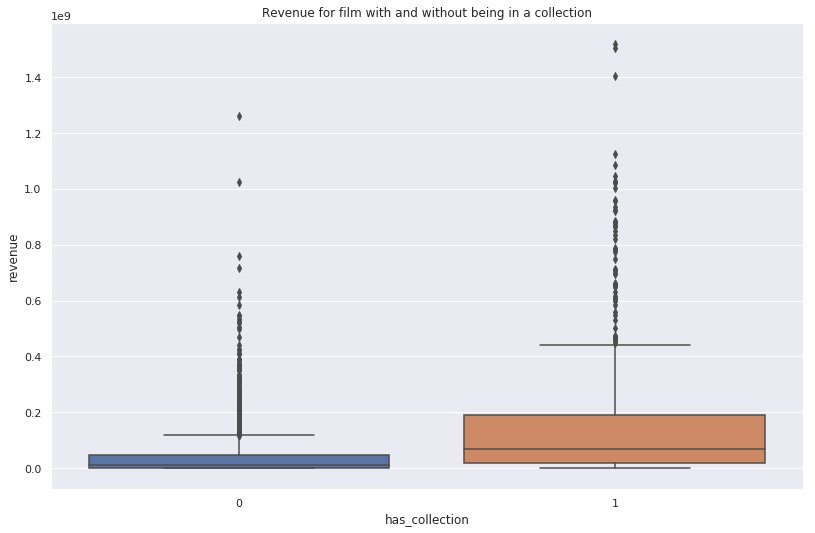

In [335]:
train_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in train_df['belongs_to_collection']]
test_df['has_collection'] = [0 if pd.isnull(x) else 1 for x in test_df['belongs_to_collection']]
print(train_df['has_collection'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_collection', y='revenue', data=train_df)
plt.title('Revenue for film with and without being in a collection')

#### homepage and revenue

0    2054
1     946
Name: has_homepage, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without homepage')

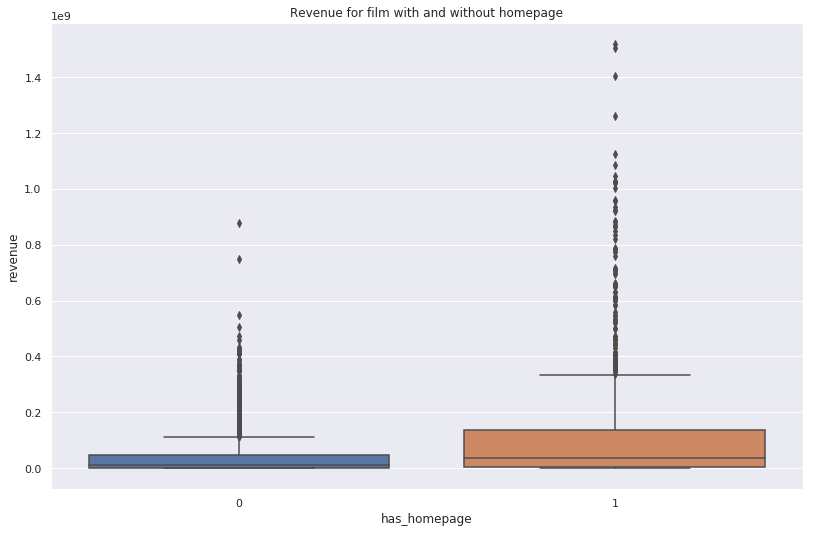

In [336]:
train_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in train_df['homepage']]
test_df['has_homepage'] = [0 if pd.isnull(x) else 1 for x in test_df['homepage']]
print(train_df['has_homepage'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_homepage', y='revenue', data=train_df)
plt.title('Revenue for film with and without homepage')

#### tagline and revenue

1    2403
0     597
Name: has_tag, dtype: int64


Text(0.5, 1.0, 'Revenue for film with and without tagline')

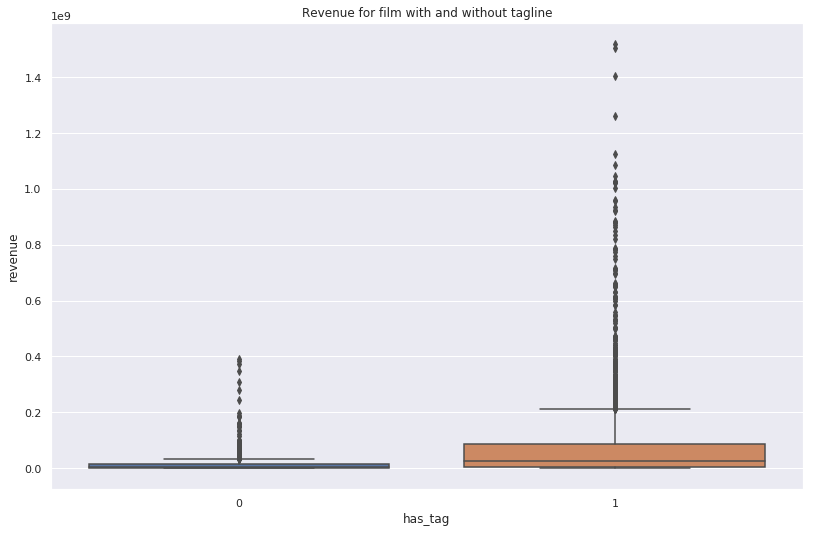

In [337]:
train_df['has_tag'] = [0 if pd.isnull(x) else 1 for x in train_df['tagline']]
test_df['has_tag'] = [0 if pd.isnull(x) else 1 for x in test_df['tagline']]
print(train_df['has_tag'].value_counts())

sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='has_tag', y='revenue', data=train_df)
plt.title('Revenue for film with and without tagline')

#### Number of Genres per movie and revenues

Text(0.5, 1.0, 'Revenues for films with multiple genres')

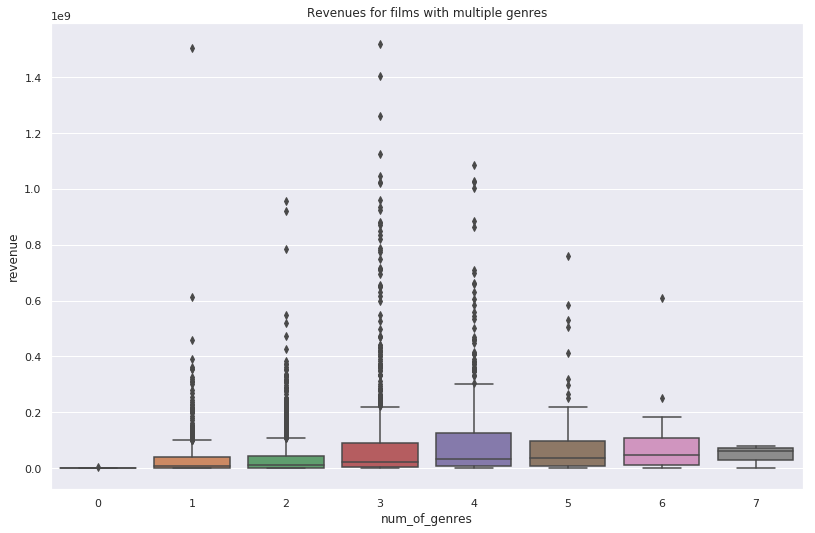

In [338]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_genres', y='revenue', data=train_df)
plt.title('Revenues for films with multiple genres')

#### Bivariate Analysis between each genre and revenue

In [339]:
for i, g in enumerate(genres_df.index.values):
    genres_df.loc[g, "median_salary"] = train_df[train_df['isGenre_' + g]==1].revenue.median()

genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

number_of_movies  median_salary
Drama                       1531     11293663.0
Comedy                      1028     18809184.0
Thriller                     789     21890845.0
Action                       741     36000000.0
Romance                      571     14016568.0
Crime                        469     24048000.0
Adventure                    439     59700000.0
Horror                       301     17037887.0
ScienceFiction               290     35109301.5
Family                       260     57470029.5

Text(0.5, 1.0, 'Sorted movie genres by median revenue')

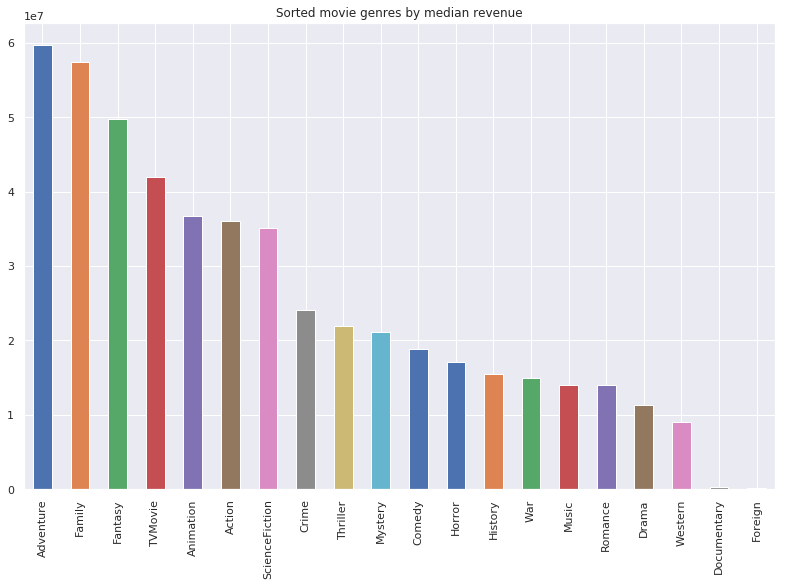

In [340]:
genres_df.sort_values(by=["median_salary"], ascending=False).median_salary.plot.bar()
plt.title("Sorted movie genres by median revenue")

In [341]:
for i, p in enumerate(genres_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopGenre_' + p] = train_df['genres_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopGenre_' + p] = test_df['genres_processed'].apply(lambda x: 1 if p in x else 0)

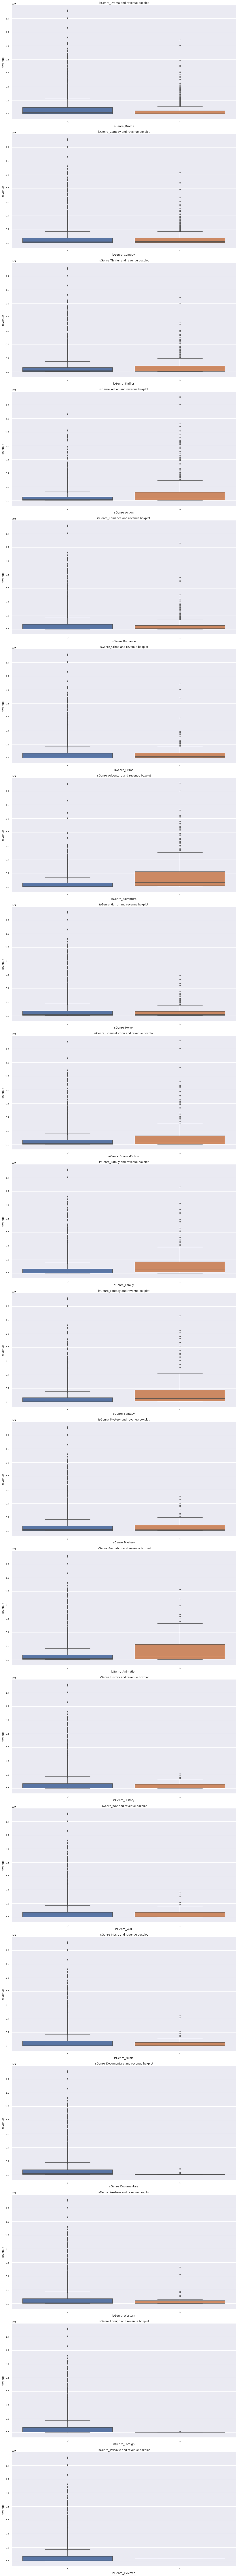

In [342]:
f, ax = plt.subplots(len(genres_df.index.values), 1, figsize=(15,160))

for i, g in enumerate(genres_df.index.values):
    sns.boxplot(x=train_df['isGenre_' + g], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isGenre_' + g +" and revenue boxplot")
f.tight_layout()

#### original_language and revenue

Text(0.5, 1.0, 'Revenue for a movie and its and original_language')

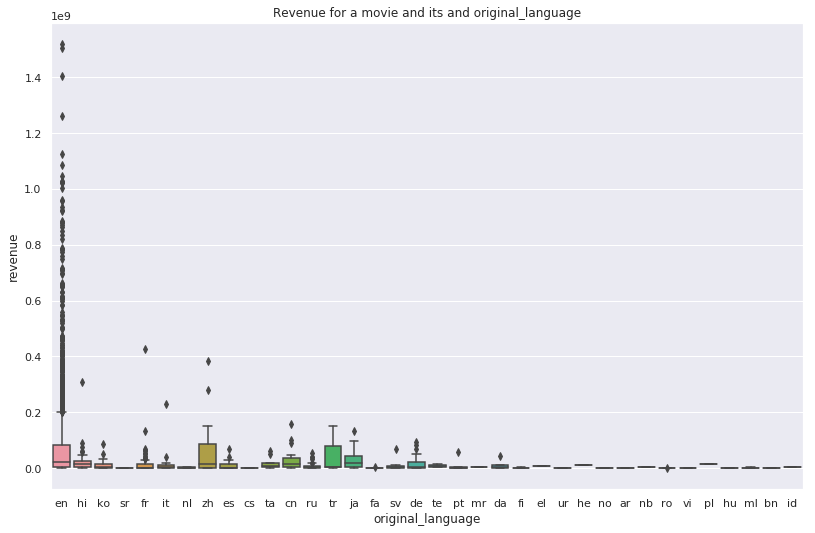

In [343]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='original_language', y='revenue', data=train_df)
plt.title('Revenue for a movie and its and original_language')

#### English and non english movies vs revenue

Text(0.5, 1.0, 'Revenue for a movie in contrast with english and non-english language')

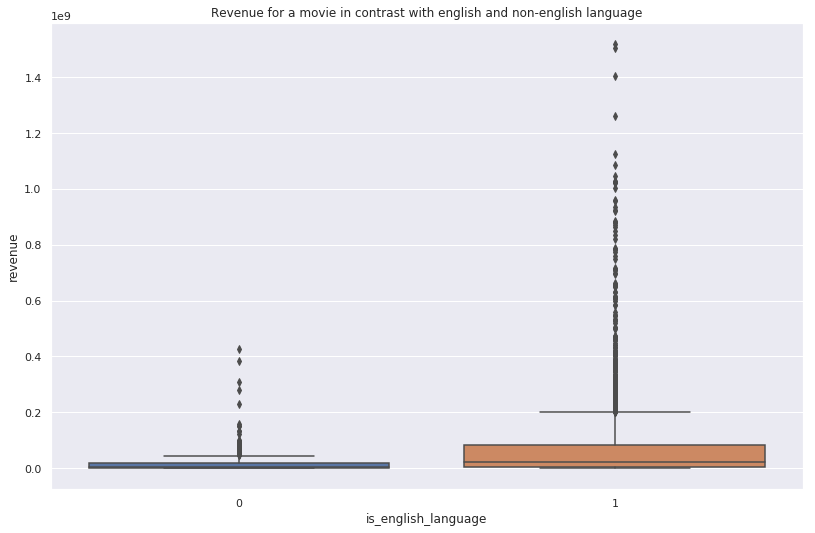

In [344]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='is_english_language', y='revenue', data=train_df)
plt.title('Revenue for a movie in contrast with english and non-english language')

#### production country and revenue

Text(0.5, 1.0, 'number of production countries for a movie and revenue')

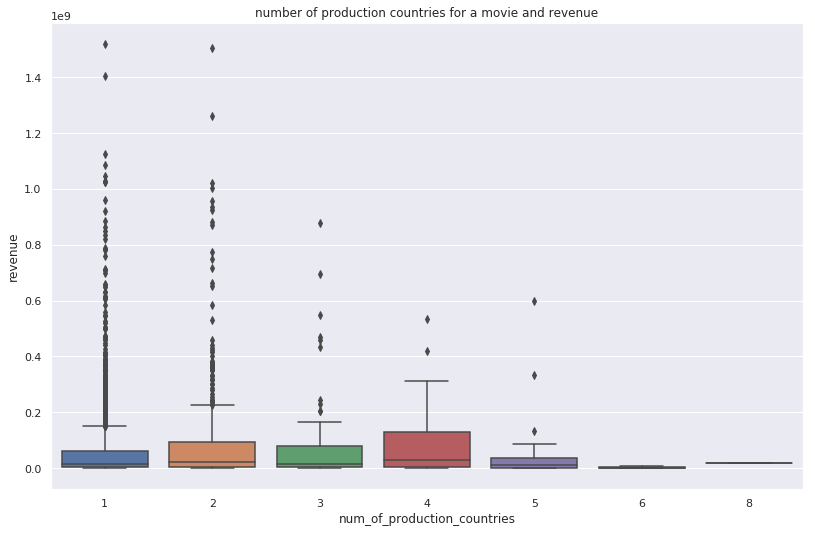

In [345]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_countries', y='revenue', data=train_df)
plt.title('number of production countries for a movie and revenue')

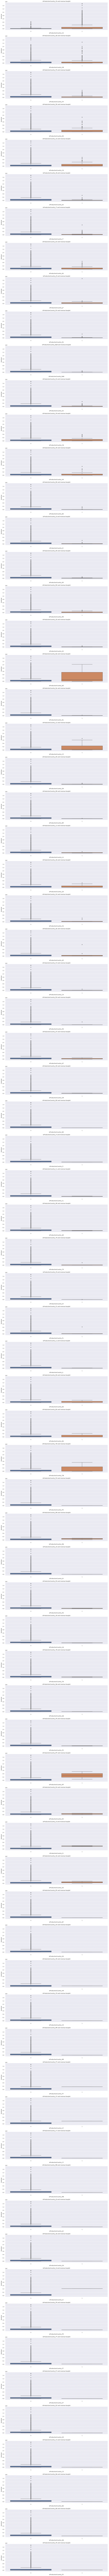

In [346]:
f, ax = plt.subplots(len(production_countries_df.index.values), 1, figsize=(15,350))

for i, c in enumerate(production_countries_df.index.values):
    sns.boxplot(x=train_df['isProductionCountry_' + c], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isProductionCountry_' + c +" and revenue boxplot")
f.tight_layout()

In [347]:
for i, c in enumerate(production_countries_df.index.values):
    production_countries_df.loc[c, "median_salary"] = train_df[train_df['isProductionCountry_' + c]==1].revenue.median()

production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10)

number_of_movies  median_salary
US              2282     25000000.0
GB               380     15020873.0
FR               222      8056215.0
DE               167     27053815.0
CA               120     29005408.5
IN                81      9700000.0
IT                64      8615430.5
AU                61     18340000.0
JP                61     17555141.0
RU                58      2458251.5

In [348]:
for i, p in enumerate(production_countries_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopProductionCountry_' + p] = train_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopProductionCountry_' + p] = test_df['production_countries_processed'].apply(lambda x: 1 if p in x else 0)

#### Day of the week when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

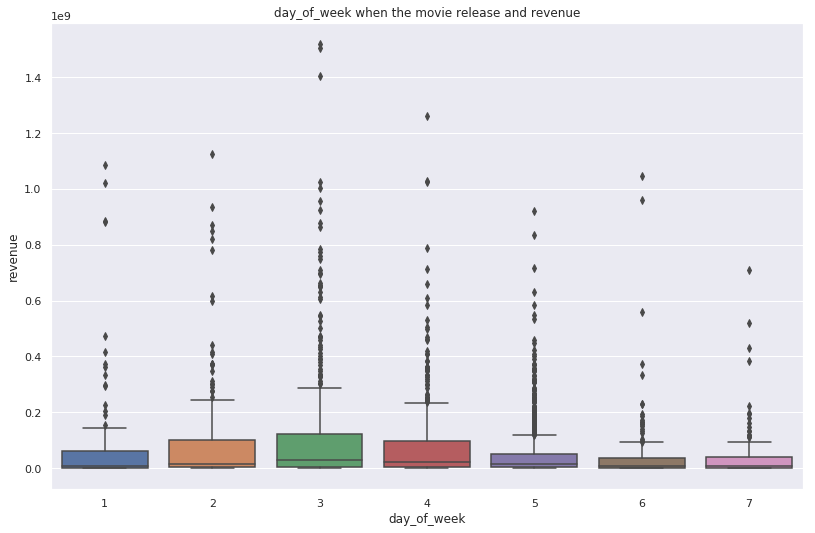

In [349]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='day_of_week', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Week of year when the movie released and revenue

Text(0.5, 1.0, 'day_of_week when the movie release and revenue')

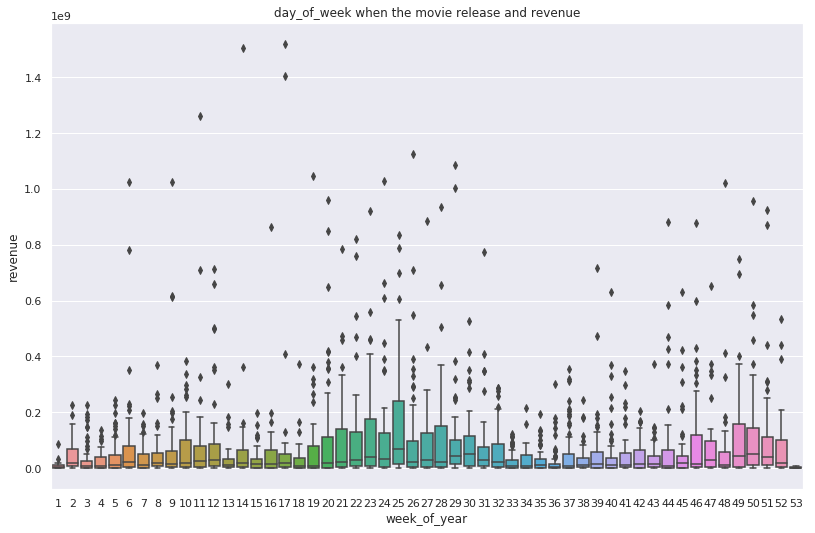

In [350]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='week_of_year', y='revenue', data=train_df)
plt.title('day_of_week when the movie release and revenue')

#### Month when the movie released and revenue

Text(0.5, 1.0, 'month when the movie release and revenue')

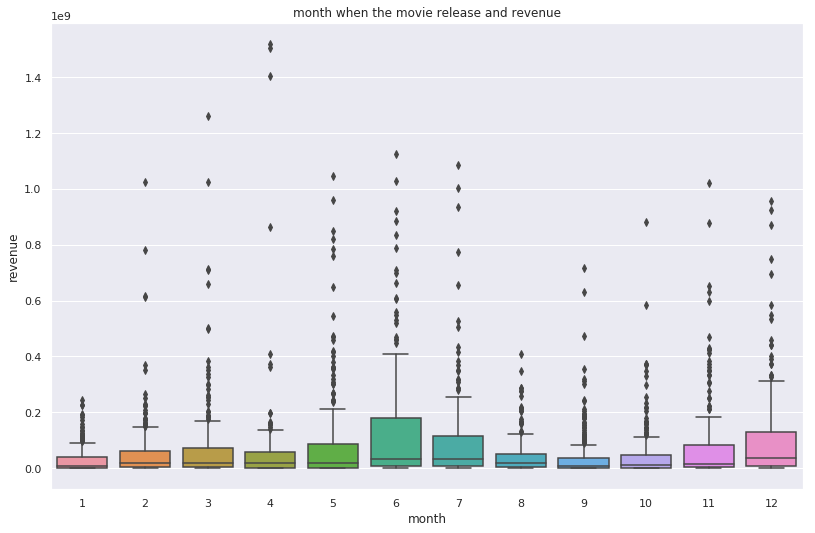

In [351]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='month', y='revenue', data=train_df)
plt.title('month when the movie release and revenue')

#### Season when the movie released and revenue

Text(0.5, 1.0, 'season when the movie release and revenue')

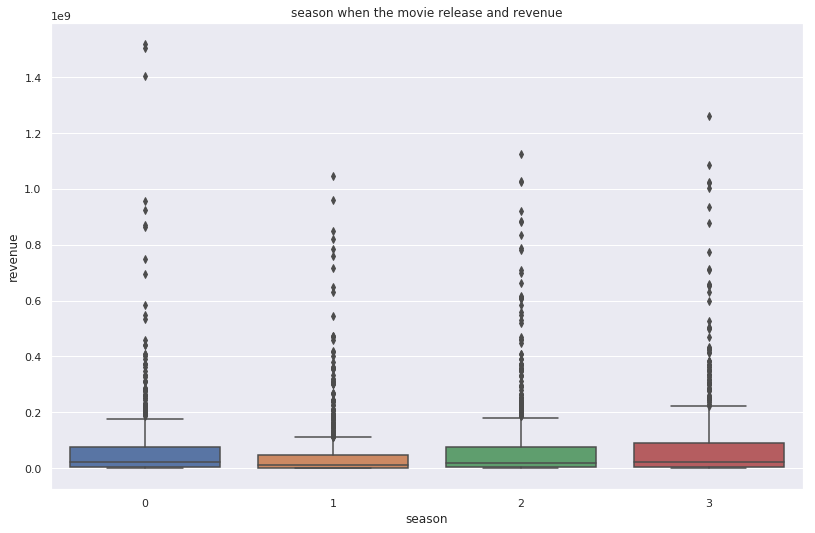

In [352]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='season', y='revenue', data=train_df)
plt.title('season when the movie release and revenue')

#### Year when the movie released and revenue

Text(0.5, 1.0, 'Year when the movie release and revenue')

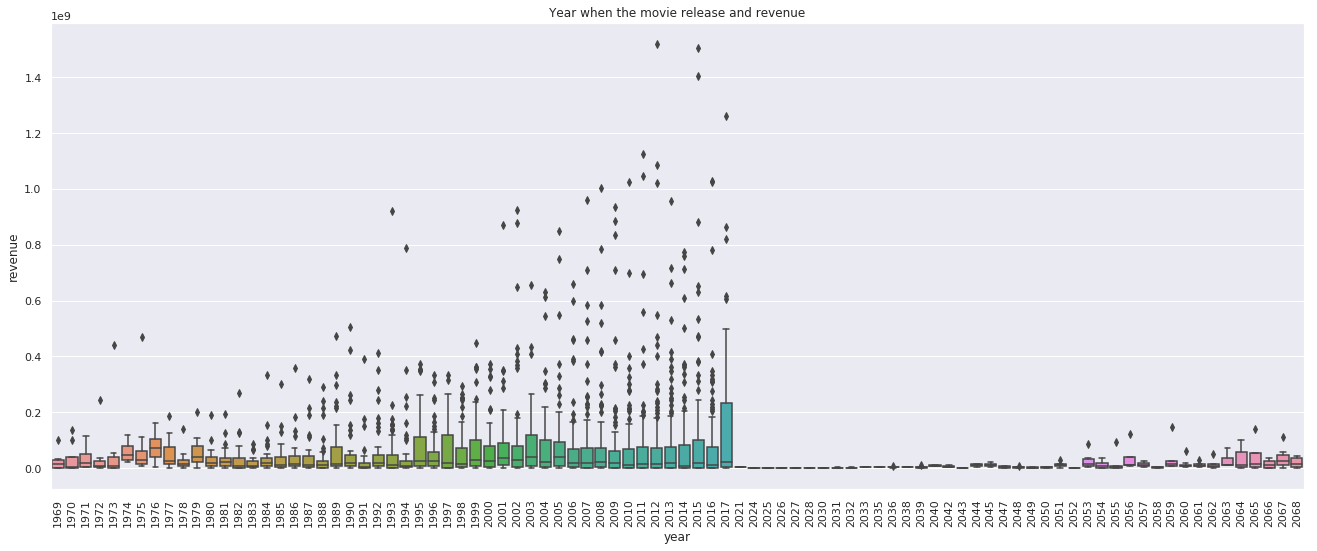

In [353]:
sns.set(rc={'figure.figsize':(20, 8)})
g = sns.boxplot(x='year', y='revenue', data=train_df)
plt.xticks(rotation=90)
plt.title('Year when the movie release and revenue')

#### Number of Production Companies and revenue

Text(0.5, 1.0, 'number of production companies for a movie and revenue')

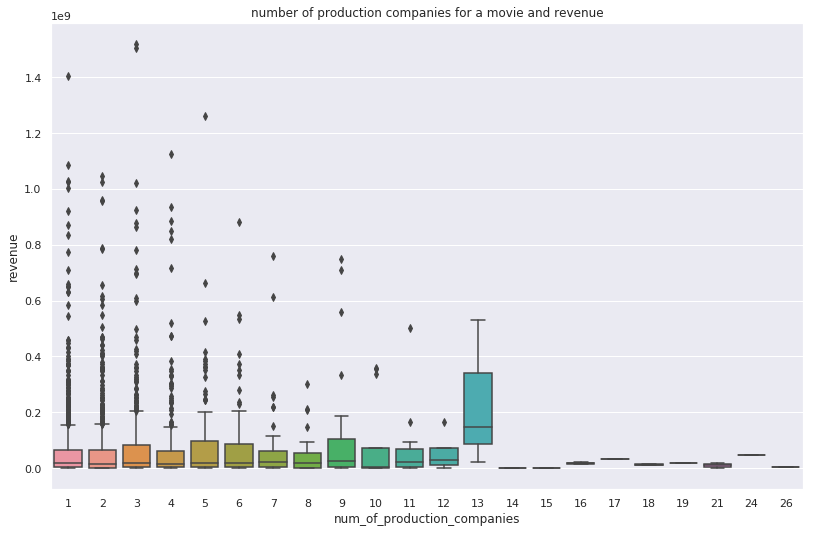

In [354]:
sns.set(rc={'figure.figsize':(12, 8)})
sns.boxplot(x='num_of_production_companies', y='revenue', data=train_df)
plt.title('number of production companies for a movie and revenue')

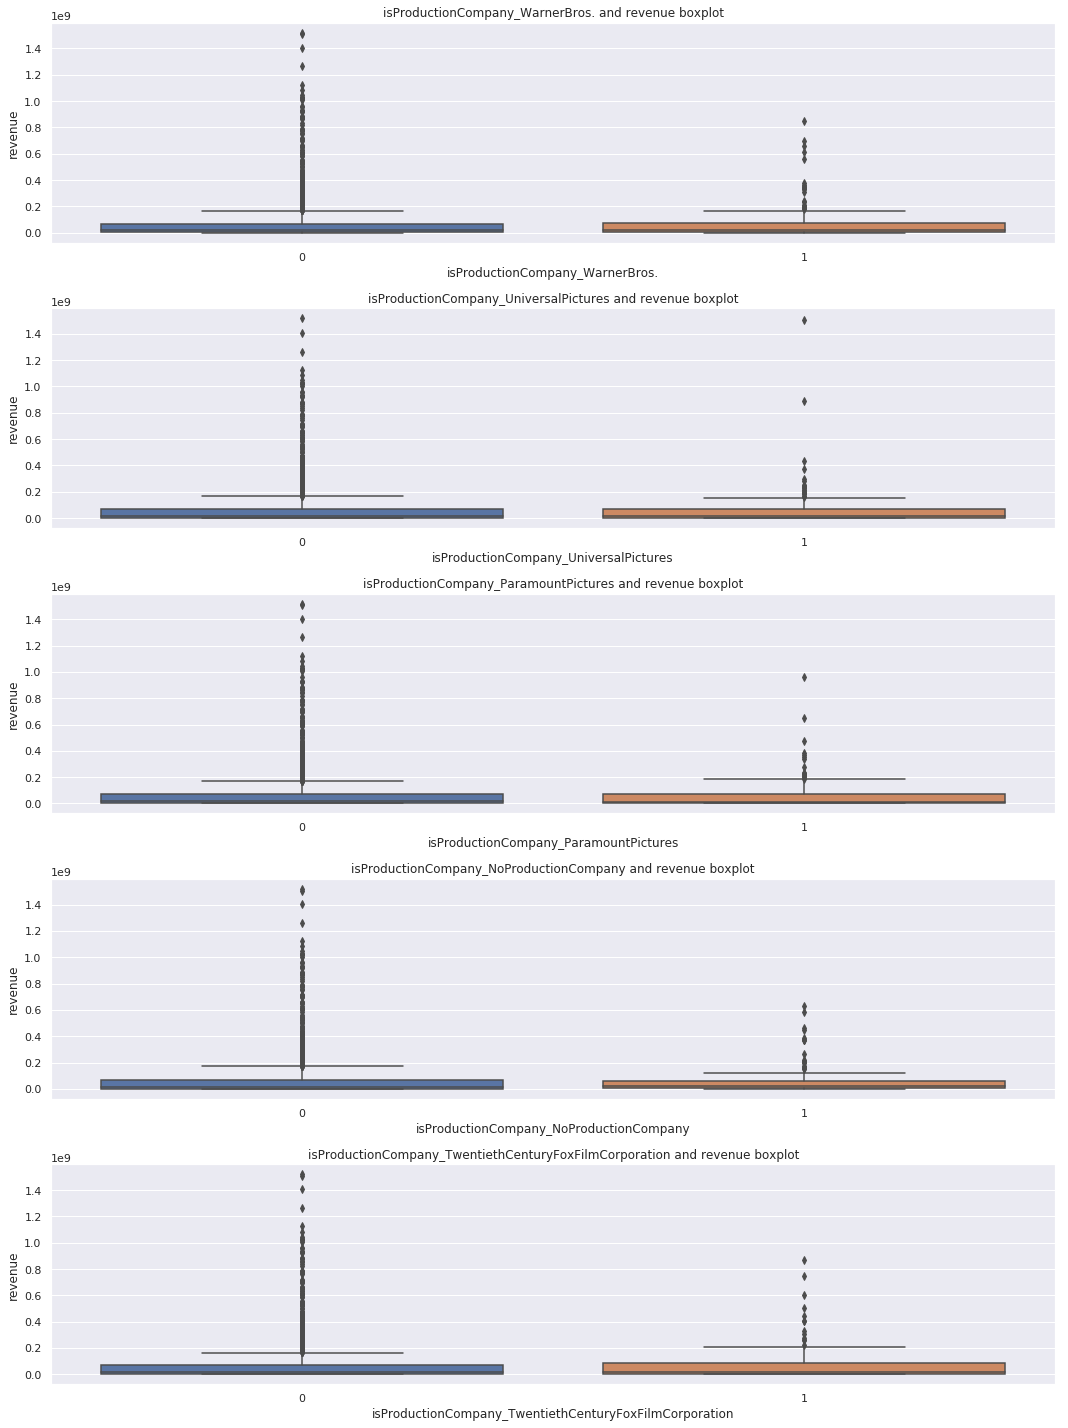

In [355]:
f, ax = plt.subplots(len(production_companies_df.head(5).index.values), 1, figsize=(15,20))

for i, p in enumerate(production_companies_df.head(5).index.values):
    sns.boxplot(x=train_df['isProductionCompany_' + p], y='revenue', ax=ax[i], data=train_df)
    ax[i].set_title('isProductionCompany_' + p +" and revenue boxplot")
f.tight_layout()

In [356]:
for i, p in enumerate(production_companies_df.index.values):
    production_companies_df.loc[p, "median_salary"] = train_df[train_df['isProductionCompany_' + p]==1].revenue.median()

production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(5)

number_of_movies  median_salary
WarnerBros.                                      199     17297244.0
UniversalPictures                                179     14010832.0
ParamountPictures                                170     15003691.5
NoProductionCompany                              169     21284514.0
TwentiethCenturyFoxFilmCorporation               144     19144537.0

In [357]:
for i, p in enumerate(production_companies_df.sort_values(by=["number_of_movies", "median_salary"], ascending=False).head(10).index.values):
    train_df['isTopProductionCompany_' + p] = train_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)
    test_df['isTopProductionCompany_' + p] = test_df['production_companies_processed'].apply(lambda x: 1 if p in x else 0)

## Machine Learning

![](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)
[image-source](https://cmci.colorado.edu/classes/INFO-4604/fa17/wordcloud.png)

#### Preparations before ML modeling

In [358]:
train_df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity',
       ...
       'isTopProductionCompany_WarnerBros.',
       'isTopProductionCompany_UniversalPictures',
       'isTopProductionCompany_ParamountPictures',
       'isTopProductionCompany_NoProductionCompany',
       'isTopProductionCompany_TwentiethCenturyFoxFilmCorporation',
       'isTopProductionCompany_ColumbiaPictures',
       'isTopProductionCompany_Metro-Goldwyn-Mayer(MGM)',
       'isTopProductionCompany_NewLineCinema',
       'isTopProductionCompany_WaltDisneyPictures',
       'isTopProductionCompany_TouchstonePictures'],
      dtype='object', length=4040)

In [359]:
columns_for_training = ["log_budget", "log_popularity", "runtime", "day_of_week", "year", "month", "week_of_year", "season",
                        "num_genres", "num_of_production_countries", "log_num_of_cast", "log_num_of_male_cast", "log_num_of_female_cast", "has_collection", 
                        "has_homepage", "has_tag", "is_english_language",
                       "log_num_of_crew", "log_num_of_male_crew", "log_num_of_female_crew"]

# adding isTopGenre_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopGenre_'), axis=1).columns.values)

# adding isTopProductionCountry_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCompany_'), axis=1).columns.values)


# adding isTopProductionCountry_ columns for features before ML modeling
columns_for_training.extend(train_df.select(lambda col: col.startswith('isTopProductionCountry_'), axis=1).columns.values)

columns_for_training

['log_budget',
 'log_popularity',
 'runtime',
 'day_of_week',
 'year',
 'month',
 'week_of_year',
 'season',
 'num_genres',
 'num_of_production_countries',
 'log_num_of_cast',
 'log_num_of_male_cast',
 'log_num_of_female_cast',
 'has_collection',
 'has_homepage',
 'has_tag',
 'is_english_language',
 'log_num_of_crew',
 'log_num_of_male_crew',
 'log_num_of_female_crew',
 'isTopGenre_Drama',
 'isTopGenre_Comedy',
 'isTopGenre_Thriller',
 'isTopGenre_Action',
 'isTopGenre_Romance',
 'isTopGenre_Crime',
 'isTopGenre_Adventure',
 'isTopGenre_Horror',
 'isTopGenre_ScienceFiction',
 'isTopGenre_Family',
 'isTopProductionCompany_WarnerBros.',
 'isTopProductionCompany_UniversalPictures',
 'isTopProductionCompany_ParamountPictures',
 'isTopProductionCompany_NoProductionCompany',
 'isTopProductionCompany_TwentiethCenturyFoxFilmCorporation',
 'isTopProductionCompany_ColumbiaPictures',
 'isTopProductionCompany_Metro-Goldwyn-Mayer(MGM)',
 'isTopProductionCompany_NewLineCinema',
 'isTopProductionComp

In [360]:
train_df[columns_for_training].head(4)

log_budget            ...              isTopProductionCountry_RU
0   16.454568            ...                                      0
1   17.504390            ...                                      0
2   15.009433            ...                                      0
3   13.997833            ...                                      0

[4 rows x 50 columns]

In [361]:
### a small code for t-test significance between 2 groups, I may use it in the future:


#from scipy import stats

#columns_to_test = train_df.select(lambda col: col.startswith('isProductionCompany_'), axis=1).columns.values

#def check_catagorical_to_revenue_statistical_difference(train_df):
    
#    for col in columns_to_test:

#        a = train_df[train_df[col]==0].revenue
#        b = train_df[train_df[col]==1].revenue
#        t2, p2 = stats.ttest_ind(a,b)
#        if p2<0.05:
#            print(col , " is important for prediction with p-value:", p2)
        
#check_catagorical_to_revenue_statistical_difference(train_df)
    

In [362]:
y = train_df['log_revenue']
X = train_df[columns_for_training]
kfold_splits = 5

### Baseline XGBoost modeling


Fold: 0

[0]	validation_0-rmse:14.1948	validation_1-rmse:14.1258
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.73682	validation_1-rmse:1.94363
[200]	validation_0-rmse:1.50564	validation_1-rmse:1.95831
[300]	validation_0-rmse:1.30507	validation_1-rmse:1.97834
[400]	validation_0-rmse:1.15983	validation_1-rmse:1.98062
[500]	validation_0-rmse:1.0538	validation_1-rmse:1.99741
[600]	validation_0-rmse:0.954246	validation_1-rmse:2.005
[700]	validation_0-rmse:0.871197	validation_1-rmse:2.01337
[800]	validation_0-rmse:0.805589	validation_1-rmse:2.01874
[900]	validation_0-rmse:0.742813	validation_1-rmse:2.02162
[1000]	validation_0-rmse:0.686497	validation_1-rmse:2.02124
Stopping. Best iteration:
[77]	validation_0-rmse:1.80046	validation_1-rmse:1.93912


Fold: 1

[0]	validation_0-rmse:14.162	validation_1-rmse:14.2542
Multiple eval metrics have been passed: '

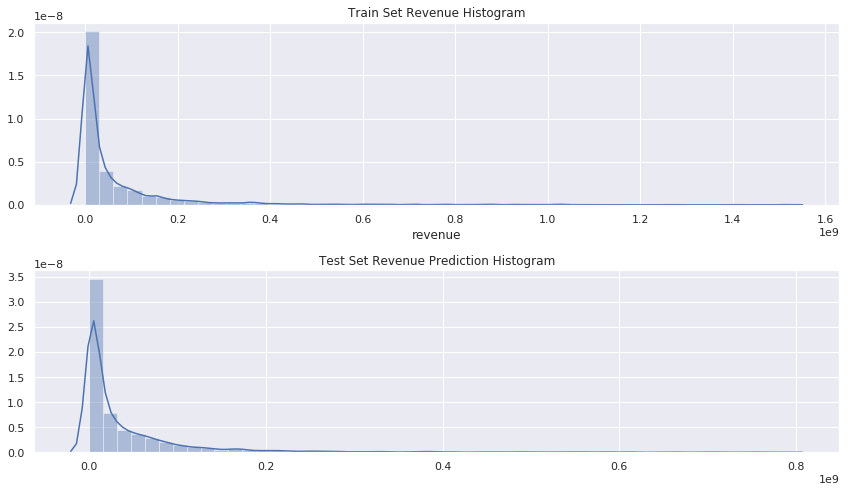

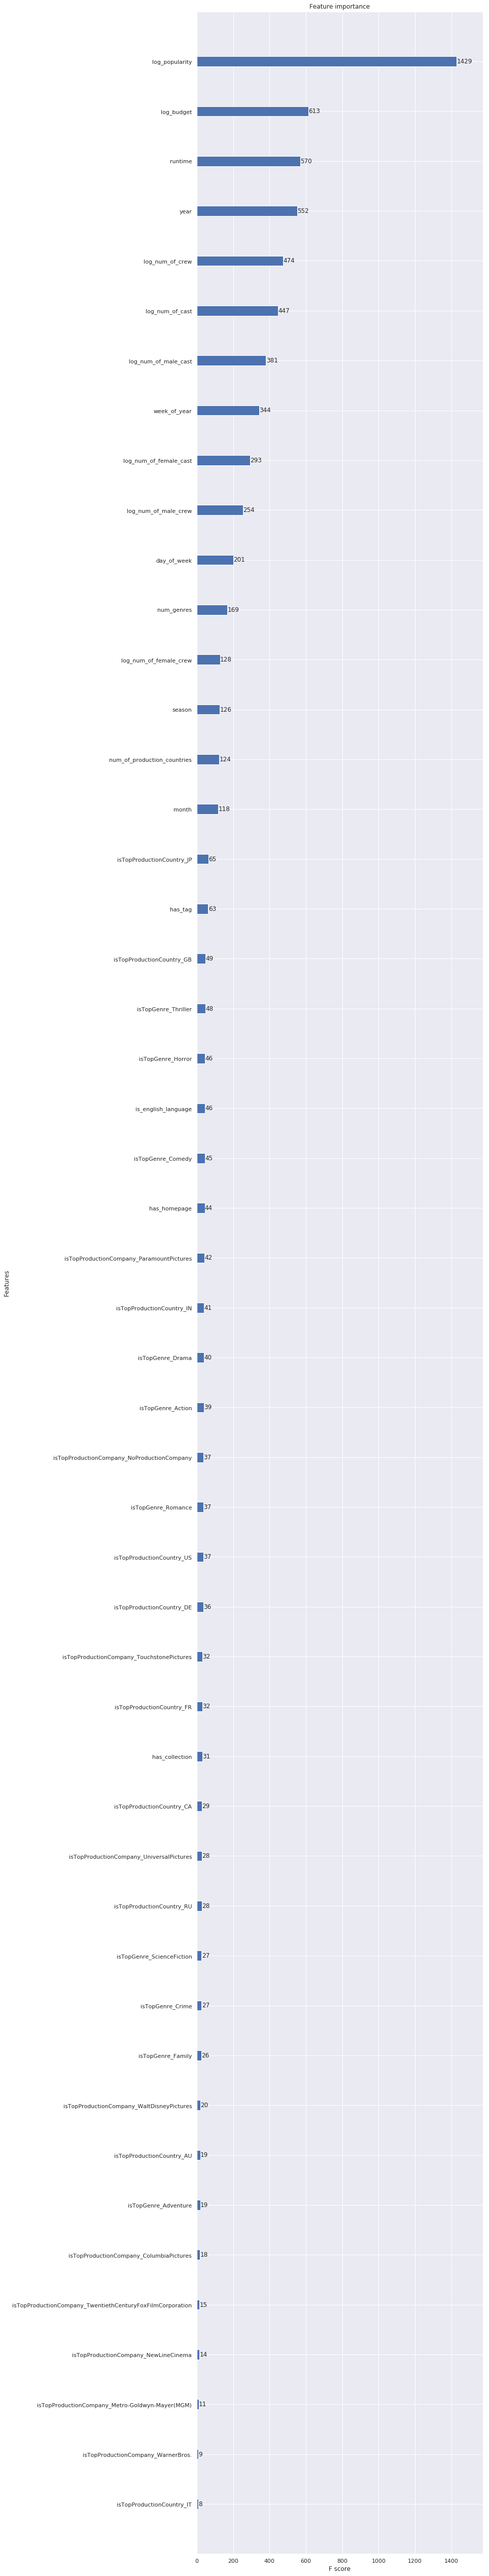

In [363]:
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt
import time
import random

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)


predictions_test_xgb = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_stra_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread=-1)

    clf_stra_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb += clf_stra_xgb.predict(test_df[xtrain.columns])/num_of_splits


predictions_test_xgb = np.expm1(predictions_test_xgb)
print(predictions_test_xgb)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_xgb)

### Bayesian Tuning

In [364]:
def bayesian_tuning(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    import xgboost as xgb
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = xgb.XGBRegressor(
            nthread = -1,
            objective = 'reg:linear',
            verbosity=1,
            random_state=42
        ),
        search_spaces = {
            'learning_rate': (0.01, 1.0),
            'min_child_weight': (0, 10),
            'n_estimators': (50, 100),
            'max_depth': (0, 12),
            'gamma': (1e-2, 10),
            'subsample': (0.01, 1.0),
            'colsample_bytree': (0.01, 1.0),
            'colsample_bylevel': (0.01, 1.0),
            'scale_pos_weight': (0.01, 1.0),
            'reg_lambda': (1e-1, 10),
            'reg_alpha': (1e-2, 1.0),
            'max_delta_step': (0, 10),
            'scale_pos_weight': (1e-2, 1)
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 1,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: 0.2934
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 9.32935130848986, 'learning_rate': 0.32264159755217825, 'max_delta_step': 7, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.31141867792614114, 'reg_lambda': 6.513136724634089, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: 0.4697
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.9517116675273961, 'max_delta_step': 9, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.6393718108603786, 'reg_lambda': 9.539453486878958, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: 0.4697
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.951711667527

In [365]:
result.best_params_

{'colsample_bylevel': 0.7366877378057127,
 'colsample_bytree': 0.9399760402267441,
 'gamma': 1.644435714599117,
 'learning_rate': 0.19654103884777585,
 'max_delta_step': 8,
 'max_depth': 4,
 'min_child_weight': 5,
 'n_estimators': 77,
 'reg_alpha': 0.7874310977710708,
 'reg_lambda': 5.618529316013081,
 'scale_pos_weight': 0.5930070264428381,
 'subsample': 0.5689543694097536}

### XGBoost Training after tuning


Fold: 0

[0]	validation_0-rmse:12.785	validation_1-rmse:12.7094
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.33045	validation_1-rmse:2.03851
[200]	validation_0-rmse:0.909076	validation_1-rmse:2.07015
[300]	validation_0-rmse:0.684024	validation_1-rmse:2.11747
[400]	validation_0-rmse:0.593879	validation_1-rmse:2.1182
[500]	validation_0-rmse:0.559819	validation_1-rmse:2.13441
[600]	validation_0-rmse:0.536838	validation_1-rmse:2.13805
[700]	validation_0-rmse:0.521519	validation_1-rmse:2.14254
[800]	validation_0-rmse:0.51253	validation_1-rmse:2.1412
[900]	validation_0-rmse:0.50598	validation_1-rmse:2.14169
[1000]	validation_0-rmse:0.495993	validation_1-rmse:2.14333
Stopping. Best iteration:
[44]	validation_0-rmse:1.74326	validation_1-rmse:2.00692


Fold: 1

[0]	validation_0-rmse:12.7544	validation_1-rmse:12.8315
Multiple eval metrics have been passed

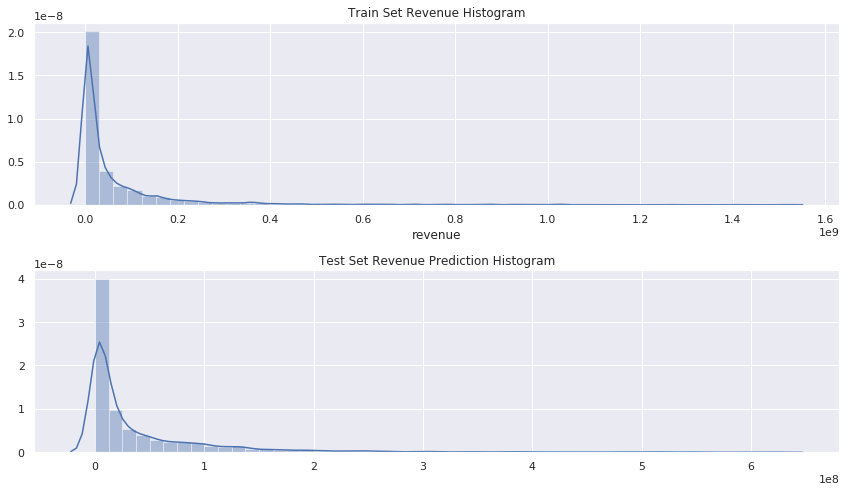

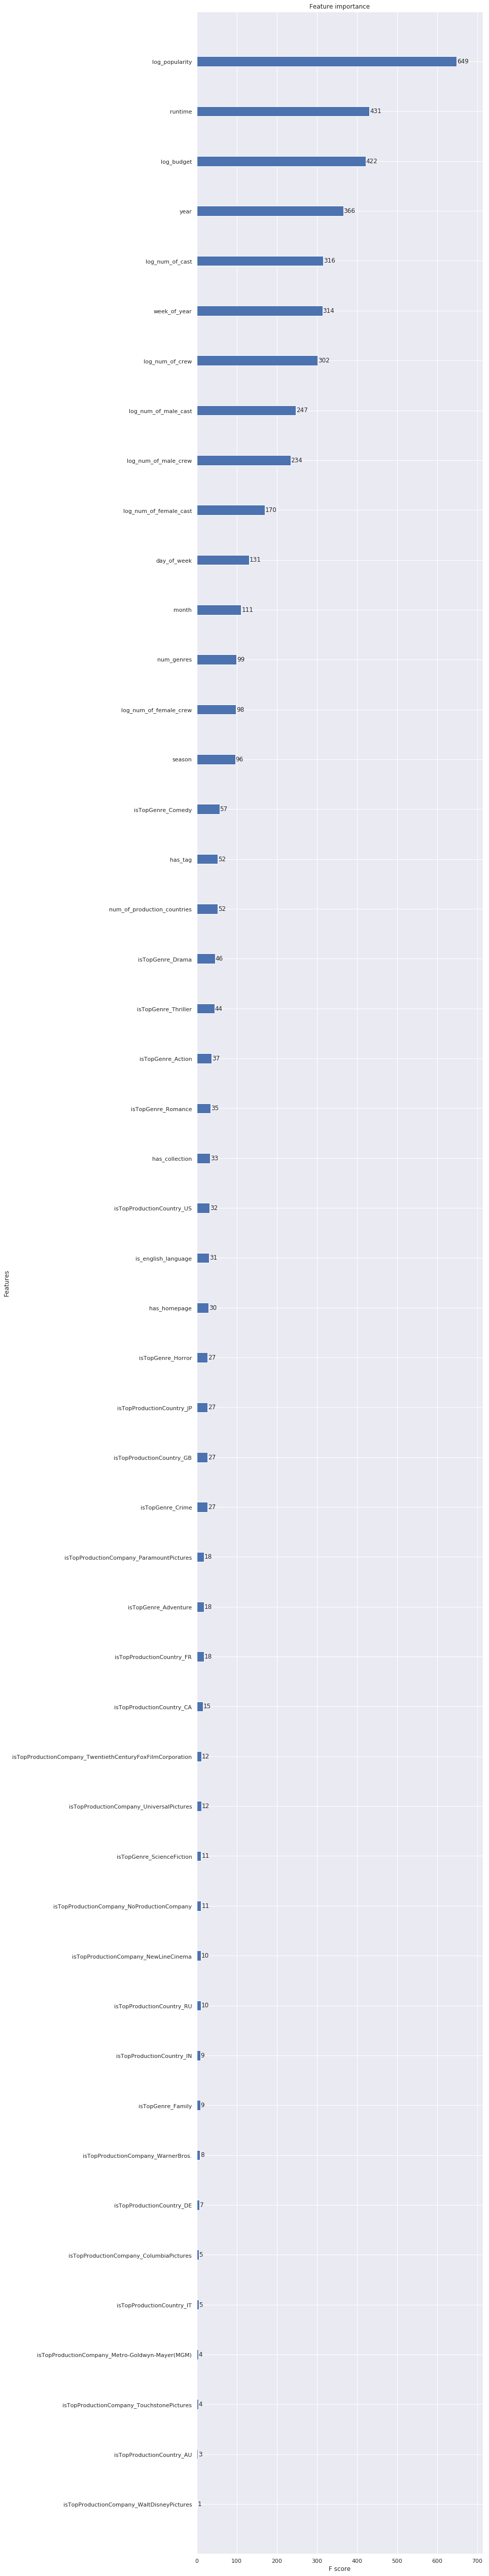

In [366]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_test_xgb_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_tuned += clf_stra_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    
print()
predictions_test_xgb_tuned = np.expm1(predictions_test_xgb_tuned)
print(predictions_test_xgb_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,86)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_tuned_xgb)

### Extra Trees Baseline Modeling


Fold: 0

Fold xvalid rmse: 2.0372865007012226

Fold: 1

Fold xvalid rmse: 2.0685006695466917

Fold: 2

Fold xvalid rmse: 2.0373870998791794

Fold: 3

Fold xvalid rmse: 2.0338723802538143

Fold: 4

Fold xvalid rmse: 2.027023365215722

[ 7054231.26592299  1651314.02592185  8611362.35715236 ...
 31553050.07273237  2129334.61353399  1434158.15634491]

OOF Out-of-fold rmse: 2.0408140031193263


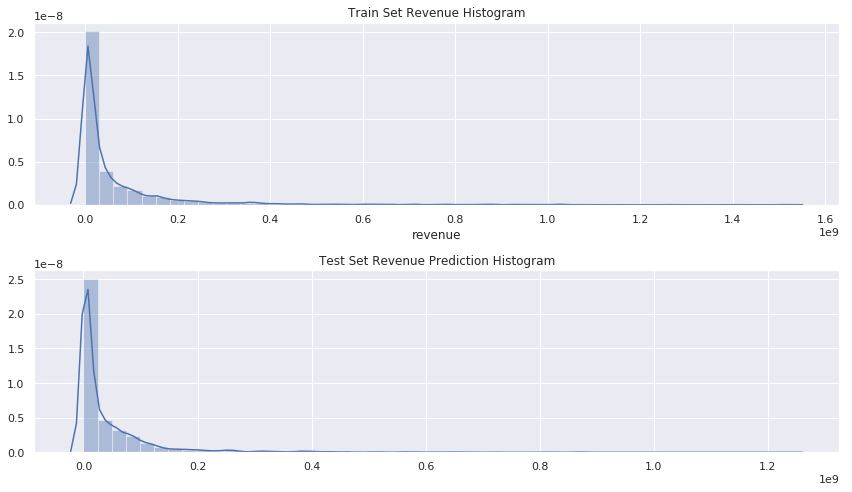

In [367]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

predictions_extra_trees_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_extra_trees = ExtraTreesRegressor(n_estimators=100, random_state=42)

    clf_extra_trees.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_extra_trees_test += clf_extra_trees.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_test = np.expm1(predictions_extra_trees_test)
print()
print(predictions_extra_trees_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Extra Trees Tuning

In [368]:
def bayesian_tuning_extra_trees(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import ExtraTreesRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = ExtraTreesRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 12),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20)
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 2,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_extra_trees = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_extra_trees
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_extra_trees = bayesian_tuning_extra_trees(xtrain, ytrain)

Model #1
Best score: 0.4807
Best params: {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 19, 'n_estimators': 165}

Model #2
Best score: 0.4876
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #3
Best score: 0.4876
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #4
Best score: 0.5068
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #5
Best score: 0.5068
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #6
Best score: 0.5068
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #7
Best score: 0.5068
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #8
Best score: 0.5068
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_sp

In [369]:
result_extra_trees.best_params_

{'max_depth': 10,
 'min_samples_leaf': 4,
 'min_samples_split': 13,
 'n_estimators': 403}

### Extra Trees Training after tuning


Fold: 0

Fold xvalid rmse: 2.04264848356676

Fold: 1

Fold xvalid rmse: 2.0444466054397163

Fold: 2

Fold xvalid rmse: 2.0193970095743476

Fold: 3

Fold xvalid rmse: 2.0223119670225973

Fold: 4

Fold xvalid rmse: 2.0408190078930466

[ 4390125.8367832   1556744.10940543  7618132.87062924 ...
 27357650.89789248  3691623.33041025  2071343.812113  ]

OOF Out-of-fold rmse: 2.033924614699294


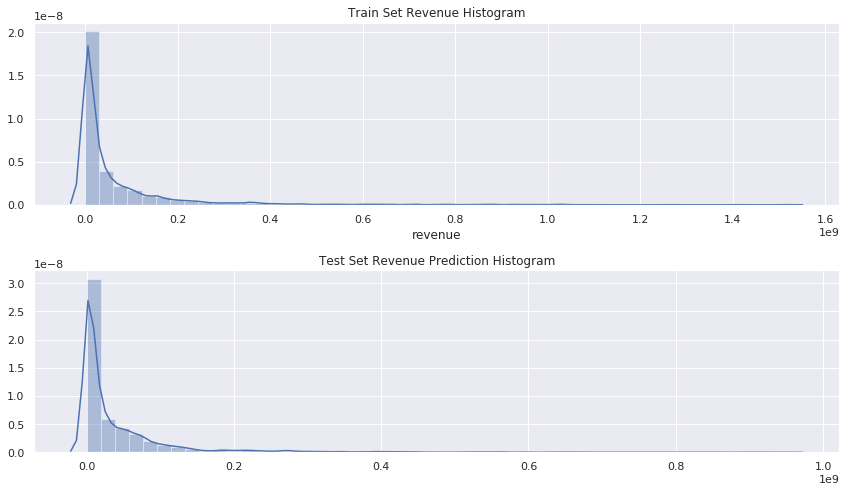

In [370]:
from sklearn.ensemble import ExtraTreesRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_extra_trees_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()

    clf_extra_trees_tuned = ExtraTreesRegressor(random_state=42, 
                                                max_depth = result_extra_trees.best_params_['max_depth'], 
                                                min_samples_leaf = result_extra_trees.best_params_['min_samples_leaf'], 
                                                min_samples_split = result_extra_trees.best_params_['min_samples_split'], 
                                                n_estimators = result_extra_trees.best_params_['n_estimators'])

    clf_extra_trees_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_extra_trees_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_extra_trees_tuned_test += clf_extra_trees_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_extra_trees_tuned_test = np.expm1(predictions_extra_trees_tuned_test)
print()
print(predictions_extra_trees_tuned_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_extra_trees_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Baseline


Fold: 0

Fold xvalid rmse: 2.1071409197328035

Fold: 1

Fold xvalid rmse: 2.0973284334907265

Fold: 2

Fold xvalid rmse: 2.0887356730574025

Fold: 3

Fold xvalid rmse: 2.0787436177683483

Fold: 4

Fold xvalid rmse: 2.0617250616086102

[ 2466912.97444414   740592.04051167 13350230.13780219 ...
 31553822.70615933  1978424.69269499  1512885.68594313]

OOF Out-of-fold rmse: 2.086734741131578


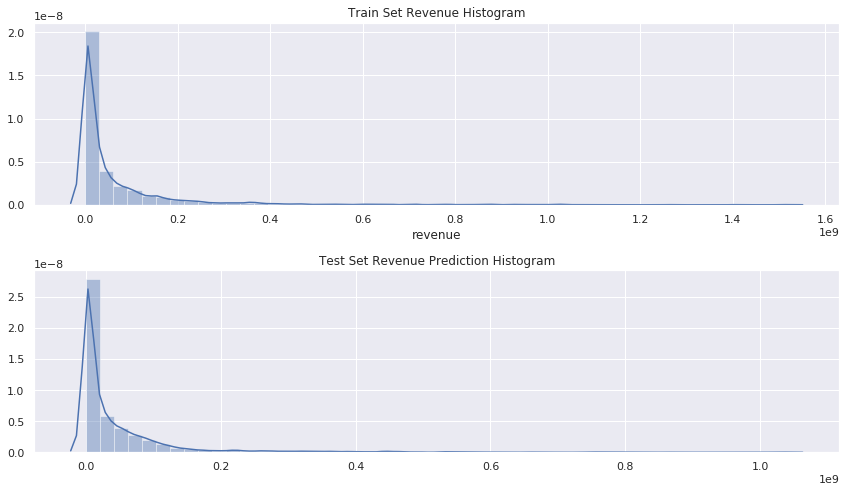

In [371]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_random_forest_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    clf_random_forest = RandomForestRegressor(random_state=42, n_estimators = 100)

    clf_random_forest.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_random_forest_test += clf_random_forest.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_test = np.expm1(predictions_random_forest_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

### Random Forest Tuning

In [372]:
def bayesian_tuning_random_forest(xtrain, ytrain):
    
    from skopt import BayesSearchCV
    from sklearn.ensemble import RandomForestRegressor
    
    
    # Classifier
    bayes_cv_tuner = BayesSearchCV(
        estimator = RandomForestRegressor(
            random_state=42
        ),
        search_spaces = {
            'n_estimators': (10, 500),
            'max_depth': (1, 12),
            'min_samples_split': (2, 20),
            'min_samples_leaf': (1, 20)
        },
        cv = KFold(
            n_splits=kfold_splits,
            shuffle=True,
            random_state=42
        ),
        n_jobs = 2,
        n_iter = 12,   
        verbose = 0,
        refit = True,
        random_state = 42
    )

    def status_print(optim_result):
        """Status callback durring bayesian hyperparameter search"""

        # Get all the models tested so far in DataFrame format
        all_models = pd.DataFrame(bayes_cv_tuner.cv_results_)    

        # Get current parameters and the best parameters    
        best_params = pd.Series(bayes_cv_tuner.best_params_)
        print('Model #{}\nBest score: {}\nBest params: {}\n'.format(
            len(all_models),
            np.round(bayes_cv_tuner.best_score_, 4),
            bayes_cv_tuner.best_params_
        ))
        
    result_random_forest = bayes_cv_tuner.fit(xtrain, ytrain, callback = status_print)
    return result_random_forest
    
# Fit the model
#xtrain, ytrain = prepare_for_tuning(X, y, type_of_training=type_of_training)
result_random_forest = bayesian_tuning_random_forest(xtrain, ytrain)

Model #1
Best score: 0.4981
Best params: {'max_depth': 6, 'min_samples_leaf': 15, 'min_samples_split': 19, 'n_estimators': 165}

Model #2
Best score: 0.5001
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #3
Best score: 0.5001
Best params: {'max_depth': 10, 'min_samples_leaf': 18, 'min_samples_split': 7, 'n_estimators': 476}

Model #4
Best score: 0.5017
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #5
Best score: 0.5017
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #6
Best score: 0.5017
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #7
Best score: 0.5017
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 13, 'n_estimators': 403}

Model #8
Best score: 0.5017
Best params: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_sp

In [373]:
result_random_forest.best_params_

{'max_depth': 12,
 'min_samples_leaf': 14,
 'min_samples_split': 18,
 'n_estimators': 214}

### Random Forest After tuning


Fold: 0

Fold xvalid rmse: 2.0765618953995104

Fold: 1

Fold xvalid rmse: 2.07274360906303

Fold: 2

Fold xvalid rmse: 2.0652660861564662

Fold: 3

Fold xvalid rmse: 2.058190648845407

Fold: 4

Fold xvalid rmse: 2.0629096385870134

[ 2466912.97444414   740592.04051167 13350230.13780219 ...
 31553822.70615933  1978424.69269499  1512885.68594313]

OOF Out-of-fold rmse: 2.0671343756102853


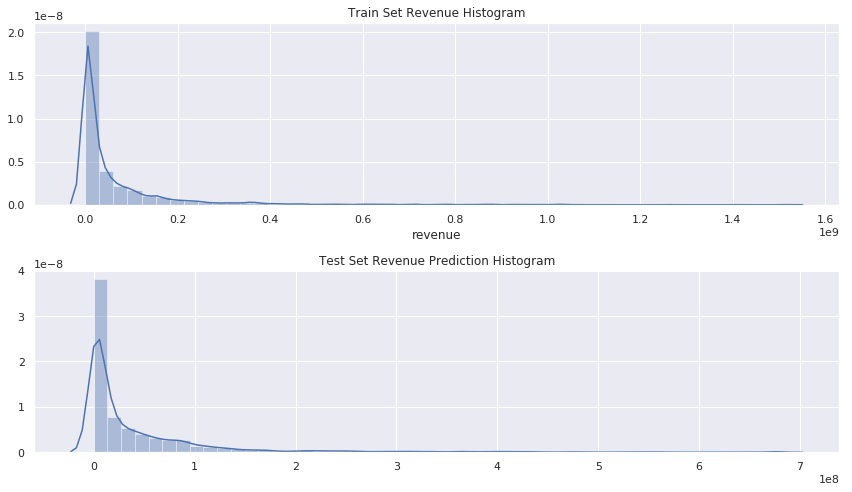

In [374]:
from sklearn.ensemble import RandomForestRegressor

from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import mean_squared_error
import scikitplot as skplt

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X, y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_random_forest_tuned_test = np.zeros(len(test_df))
num_fold = 0
num_of_splits = kfold_splits
oof_rmse = 0
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    clf_random_forest_tuned = RandomForestRegressor(random_state=42, 
                                              n_estimators = result_random_forest.best_params_['n_estimators'],
                                              min_samples_leaf = result_random_forest.best_params_['min_samples_leaf'],
                                              min_samples_split = result_random_forest.best_params_['min_samples_split'])

    clf_random_forest_tuned.fit(xtrain_stra, ytrain_stra)

    predictions_valid = clf_random_forest_tuned.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    print("Fold xvalid rmse:", rmse_valid)
    oof_rmse += rmse_valid

    predictions_random_forest_tuned_test += clf_random_forest_tuned.predict(test_df[xtrain.columns])/num_of_splits


predictions_random_forest_tuned_test = np.expm1(predictions_random_forest_tuned_test)
print()
print(predictions_random_forest_test)
print()
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))


sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_random_forest_tuned_test, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

## Feature Selection

### Feature Selection for xgboost

In [375]:
from sklearn.feature_selection import SelectFromModel

max_selected_features = 60
sel = SelectFromModel(clf_stra_xgb, max_features = max_selected_features, threshold=0.005, prefit=True)

feature_idx = sel.get_support()
selected_feature_names = X.columns[feature_idx]

In [376]:
selected_feature_names

Index(['log_budget', 'log_popularity', 'runtime', 'day_of_week', 'year',
       'month', 'week_of_year', 'season', 'num_genres',
       'num_of_production_countries', 'log_num_of_cast',
       'log_num_of_male_cast', 'log_num_of_female_cast', 'has_collection',
       'has_homepage', 'has_tag', 'is_english_language', 'log_num_of_crew',
       'log_num_of_male_crew', 'log_num_of_female_crew', 'isTopGenre_Drama',
       'isTopGenre_Comedy', 'isTopGenre_Thriller', 'isTopGenre_Action',
       'isTopGenre_Romance', 'isTopGenre_Crime', 'isTopGenre_Adventure',
       'isTopGenre_Horror', 'isTopGenre_ScienceFiction', 'isTopGenre_Family',
       'isTopProductionCompany_WarnerBros.',
       'isTopProductionCompany_UniversalPictures',
       'isTopProductionCompany_ParamountPictures',
       'isTopProductionCompany_NoProductionCompany',
       'isTopProductionCompany_TwentiethCenturyFoxFilmCorporation',
       'isTopProductionCompany_ColumbiaPictures',
       'isTopProductionCompany_NewLineCinema'

### Baseline XGBoost with Feature Selection


Fold: 0

[0]	validation_0-rmse:14.1948	validation_1-rmse:14.1258
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.75221	validation_1-rmse:1.97008
[200]	validation_0-rmse:1.50633	validation_1-rmse:1.95852
[300]	validation_0-rmse:1.32026	validation_1-rmse:1.98378
[400]	validation_0-rmse:1.18488	validation_1-rmse:1.99717
[500]	validation_0-rmse:1.06944	validation_1-rmse:2.00651
[600]	validation_0-rmse:0.963885	validation_1-rmse:2.034
[700]	validation_0-rmse:0.880903	validation_1-rmse:2.03357
[800]	validation_0-rmse:0.80075	validation_1-rmse:2.03538
[900]	validation_0-rmse:0.730281	validation_1-rmse:2.04787
[1000]	validation_0-rmse:0.677133	validation_1-rmse:2.0541
[1100]	validation_0-rmse:0.625211	validation_1-rmse:2.06059
Stopping. Best iteration:
[171]	validation_0-rmse:1.56242	validation_1-rmse:1.94946


Fold: 1

[0]	validation_0-rmse:14.162	validat

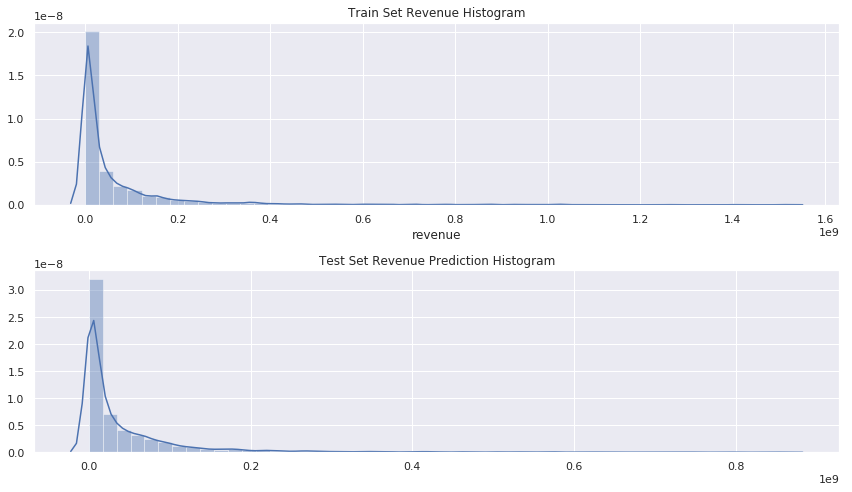

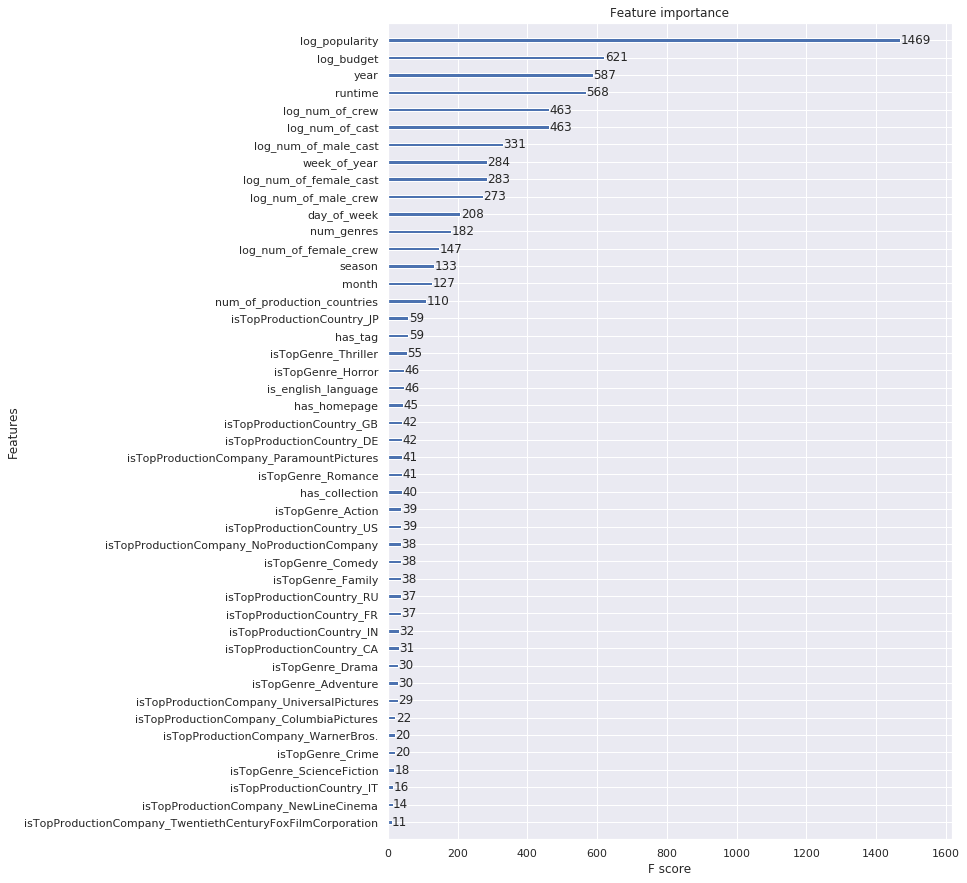

In [377]:
from sklearn.model_selection import train_test_split, StratifiedKFold, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_feature_names], y, random_state=42, test_size=0.3)

import xgboost as xgb

start_time = time.time()

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_xgb_fs = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_fs_xgb = xgb.XGBRegressor(n_estimators=10000, seed=42, nthread = -1)

    clf_stra_fs_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_fs += clf_stra_fs_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs = np.expm1(predictions_test_xgb_fs)
print(predictions_test_xgb_fs)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_xgb)

### Tuning with feature Selection

In [378]:
result = bayesian_tuning(xtrain, ytrain)

Model #1
Best score: 0.2436
Best params: {'colsample_bylevel': 0.4160029192647807, 'colsample_bytree': 0.7304484857455519, 'gamma': 9.32935130848986, 'learning_rate': 0.32264159755217825, 'max_delta_step': 7, 'max_depth': 5, 'min_child_weight': 4, 'n_estimators': 87, 'reg_alpha': 0.31141867792614114, 'reg_lambda': 6.513136724634089, 'scale_pos_weight': 0.5544643023916863, 'subsample': 0.13556548021189216}

Model #2
Best score: 0.4685
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.9517116675273961, 'max_delta_step': 9, 'max_depth': 1, 'min_child_weight': 1, 'n_estimators': 68, 'reg_alpha': 0.6393718108603786, 'reg_lambda': 9.539453486878958, 'scale_pos_weight': 0.6336020558163782, 'subsample': 0.9923710598637134}

Model #3
Best score: 0.4685
Best params: {'colsample_bylevel': 0.8390144719977516, 'colsample_bytree': 0.8844821246070537, 'gamma': 3.041066997742908, 'learning_rate': 0.951711667527

### XGBoost training with Feature Selection and tuning


Fold: 0

[0]	validation_0-rmse:11.1552	validation_1-rmse:11.0493
Multiple eval metrics have been passed: 'validation_1-rmse' will be used for early stopping.

Will train until validation_1-rmse hasn't improved in 1000 rounds.
[100]	validation_0-rmse:1.53754	validation_1-rmse:1.9648
[200]	validation_0-rmse:1.23053	validation_1-rmse:1.99226
[300]	validation_0-rmse:1.01315	validation_1-rmse:1.9972
[400]	validation_0-rmse:0.839559	validation_1-rmse:1.98766
[500]	validation_0-rmse:0.708692	validation_1-rmse:2.0054
[600]	validation_0-rmse:0.61172	validation_1-rmse:2.02026
[700]	validation_0-rmse:0.527365	validation_1-rmse:2.03444
[800]	validation_0-rmse:0.453189	validation_1-rmse:2.05227
[900]	validation_0-rmse:0.394688	validation_1-rmse:2.06105
[1000]	validation_0-rmse:0.348753	validation_1-rmse:2.06743
Stopping. Best iteration:
[31]	validation_0-rmse:1.90937	validation_1-rmse:1.9249


Fold: 1

[0]	validation_0-rmse:11.1274	validation_1-rmse:11.2228
Multiple eval metrics have been passed: 

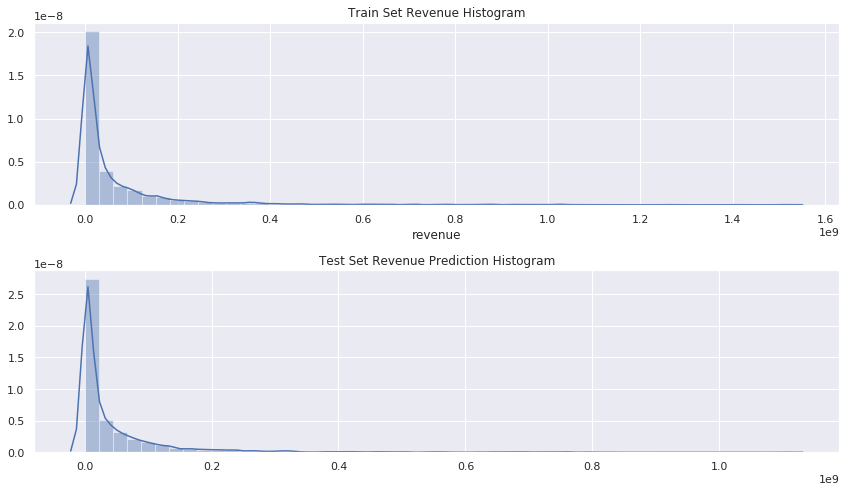

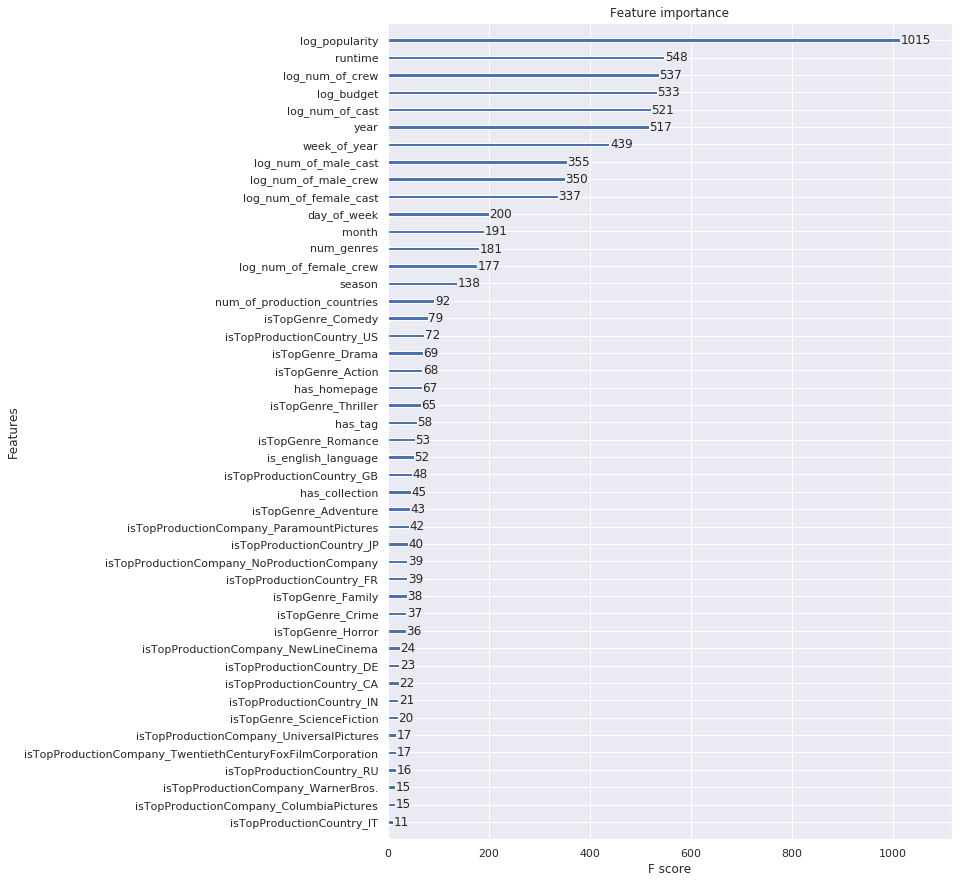

In [379]:
from sklearn.model_selection import train_test_split, KFold
import time
import random
from sklearn.metrics import mean_squared_error

import xgboost as xgb

# create a 70/30 stratified split of the data 
xtrain, xvalid, ytrain, yvalid = train_test_split(X[selected_feature_names], y, random_state=42, test_size=0.3)

#predictions_probas_list = np.zeros([len(yvalid), 2])
predictions_test_xgb_fs_tuned = np.zeros(len(test_df))
num_fold = 0
oof_rmse = 0
num_of_splits = kfold_splits
#feature_importance_df = pd.DataFrame()

folds = KFold(n_splits=num_of_splits, shuffle=False, random_state = 42)

for train_index, valid_index in folds.split(xtrain, ytrain):
    xtrain_stra, xvalid_stra = xtrain.iloc[train_index,:], xtrain.iloc[valid_index,:]
    ytrain_stra, yvalid_stra = ytrain.iloc[train_index], ytrain.iloc[valid_index]

    print()
    print("Fold:", num_fold)
    num_fold = num_fold + 1
    print()
    
    
    clf_stra_fs_tuned_xgb = xgb.XGBRegressor(colsample_bytree = result.best_params_["colsample_bytree"],
                                    gamma=result.best_params_["gamma"],                 
                                    learning_rate=result.best_params_["learning_rate"],
                                    max_depth=result.best_params_["max_depth"],
                                    min_child_weight=result.best_params_["min_child_weight"],
                                    n_estimators=10000,
                                    reg_alpha=result.best_params_["reg_alpha"],
                                    reg_lambda=result.best_params_["reg_lambda"],
                                    subsample=result.best_params_["subsample"],
                                    seed=42,
                                    nthread = -1)

    clf_stra_fs_tuned_xgb.fit(xtrain_stra, ytrain_stra, eval_set=[(xtrain_stra, ytrain_stra), (xvalid_stra, yvalid_stra)], 
                early_stopping_rounds=1000, eval_metric='rmse', verbose=100)

    predictions_valid = clf_stra_fs_tuned_xgb.predict(xvalid)
    rmse_valid = np.sqrt(mean_squared_error(yvalid, predictions_valid))
    oof_rmse += rmse_valid

    predictions_test_xgb_fs_tuned += clf_stra_fs_tuned_xgb.predict(test_df[xtrain.columns])/num_of_splits
    

predictions_test_xgb_fs_tuned = np.expm1(predictions_test_xgb_fs_tuned)
print(predictions_test_xgb_fs_tuned)
print("OOF Out-of-fold rmse:", oof_rmse/num_of_splits)

f, ax = plt.subplots(2, figsize=(12,7))

sns.set(rc={'figure.figsize':(9,14)})
sns.distplot(train_df.revenue, ax=ax[0])
ax[0].set_title("Train Set Revenue Histogram")
sns.distplot(predictions_test_xgb_fs_tuned, ax=ax[1])
ax[1].set_title("Test Set Revenue Prediction Histogram")
f.tight_layout()

xgb.plot_importance(clf_stra_fs_tuned_xgb)

## ML Blends

In [382]:
predictions_test_xgb_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_random_forest = (0.5 * predictions_test_xgb) + (0.5 * predictions_random_forest_test)
predictions_test_extra_trees_random_forest = (0.5 * predictions_extra_trees_test) + (0.5 * predictions_random_forest_test)

predictions_test_tuned_xgb_extra_trees = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_extra_trees_tuned_test)
predictions_test_tuned_xgb_random_forest = (0.5 * predictions_test_xgb_tuned) + (0.5 * predictions_random_forest_tuned_test)
predictions_test_tuned_extra_trees_random_forest = (0.5 * predictions_extra_trees_tuned_test) + (0.5 * predictions_random_forest_tuned_test)

predictions_test_xgb_fs_extra_trees =  (0.5 * predictions_test_xgb_fs) + (0.5 * predictions_extra_trees_test)
predictions_test_xgb_fs_tuned_extra_trees = (0.5 * predictions_test_xgb_fs_tuned) + (0.5 * predictions_extra_trees_test)

predictions_test_baseline_xgb_tuned_extra_trees = (0.5 * predictions_test_xgb) + (0.5 * predictions_extra_trees_tuned_test)

## Preparing for submission

In [383]:
# xgb baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb
submission.to_csv('clf_xgb_baseline.csv', index=False)

# xgb tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_tuned
submission.to_csv('clf_xgb_tuned.csv', index=False)

# extra trees baseline
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_test
submission.to_csv('clf_extra_trees_baseline.csv', index=False)

# extra trees tuning
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_extra_trees_tuned_test
submission.to_csv('clf_extra_trees_tuned.csv', index=False)

# xgb baseline with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs
submission.to_csv('clf_xgb_fs_baseline.csv', index=False)

# xgb tuning with feature selection
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned
submission.to_csv('clf_xgb_fs_tuned.csv', index=False)

# Blend 1
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_baselines.csv', index=False)

# Blend 2
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_baselines.csv', index=False)

# Blend 3
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_baselines.csv', index=False)

# Blend 4
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_extra_trees
submission.to_csv('blend_xgb_extra_trees_tuned.csv', index=False)

# Blend 5
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_xgb_random_forest
submission.to_csv('blend_xgb_random_forest_tuned.csv', index=False)

# Blend 6
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_tuned_extra_trees_random_forest
submission.to_csv('blend_extra_trees_random_forest_tuned.csv', index=False)

# Blend 7
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_baseline_xgb_tuned_extra_trees
submission.to_csv('blend_baseline_xgb_tuned_extra_trees.csv', index=False)

# Blend 8
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_extra_trees
submission.to_csv('blend_xgb_fs_extra_trees.csv', index=False)

# Blend 9
submission = pd.read_csv('../input/sample_submission.csv')
submission['revenue'] = predictions_test_xgb_fs_tuned_extra_trees
submission.to_csv('blend_xgb_fs_tuned_extra_trees.csv', index=False)

#### *Thank for your time! Any suggestions are welcomed on how to improve my models performance*